In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Exploratory Data Analysis**

# **Users**

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Mastery Project/users.csv')

Mounted at /content/drive


In [3]:
df.head() #checking the columns and the contained information

,user_id,birthdate,gender,married,has_children,home_country,home_city,home_airport,home_airport_lat,home_airport_lon,sign_up_date
0,531931,1984-05-26,F,False,False,usa,san jose,SJC,37.362,-121.929,2023-01-15
1,611065,1981-08-20,F,False,False,usa,los angeles,LAX,33.942,-118.408,2023-02-22
2,229330,1976-11-08,F,True,False,usa,colorado springs,COS,38.806,-104.700,2022-06-27
3,586762,1987-09-26,F,False,False,canada,montreal,YUL,45.468,-73.741,2023-02-11
4,536035,1995-11-09,M,False,False,usa,new york,LGA,40.777,-73.872,2023-01-17


In [4]:
df.info() #result shows that no values are missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           5782 non-null   int64  
 1   birthdate         5782 non-null   object 
 2   gender            5782 non-null   object 
 3   married           5782 non-null   bool   
 4   has_children      5782 non-null   bool   
 5   home_country      5782 non-null   object 
 6   home_city         5782 non-null   object 
 7   home_airport      5782 non-null   object 
 8   home_airport_lat  5782 non-null   float64
 9   home_airport_lon  5782 non-null   float64
 10  sign_up_date      5782 non-null   object 
dtypes: bool(2), float64(2), int64(1), object(6)
memory usage: 418.0+ KB


In [5]:
display(df.describe())

,user_id,home_airport_lat,home_airport_lon
count,5782.000000,5782.000000,5782.000000
mean,547670.236077,38.449324,-94.158017
std,64035.394540,6.199542,18.070420
min,94883.000000,21.316000,-157.927000
25%,519413.750000,33.818000,-112.289250
50%,542279.500000,39.175000,-90.035000
75%,576215.500000,42.276000,-79.370000
max,844489.000000,61.251000,-63.499000


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
#getting todays date for calculating age related columns
today = pd.Timestamp.today()

In [8]:
#tenure month, can help me later to calculate user activity or engagement by looking at the frequency of bookings since the user signed up
df['tenure_months'] = ((today - pd.to_datetime(df['sign_up_date'])).dt.days // (365 / 12)).astype('int')

In [9]:
df['birthdate'] = pd.to_datetime(df['birthdate'])

In [10]:
#datetime functions: year, month, day, day_name(), quarter, dayofyear, dayofweek()
df['birthdate'].dt.year.value_counts().head()

,count
birthdate,
1985,245
1983,220
2006,216
1981,216
1978,215


In [11]:
#calculate the age
df['age'] = ((today - df['birthdate']).dt.days // 365.25).astype(int)

In [12]:
#get a feeling how the users are spread out in age ranges. Feature creation is done to enhance my EDA and to built my desired features later
bins = [10, 20, 30, 40, 50, 60, 70, 80, 100]
labels = ['11–20', '21–30', '31–40', '41–50', '51–60', '61–70', '71–80', '81+']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True) #right=True means bins are inclusive to the right

In [13]:
df['age_group'].value_counts()

,count
age_group,
41–50,2033
31–40,1443
51–60,1042
21–30,662
11–20,272
61–70,228
71–80,89
81+,13


In [14]:
#maybe there are trends to be seen for different generations in terms of preferences
def get_generation(year):
    if year >= 2013: return "Gen Alpha"
    elif year >= 1997: return "Gen Z"
    elif year >= 1981: return "Millennial"
    elif year >= 1965: return "Gen X"
    elif year >= 1946: return "Boomer"
    else: return "Silent"

df['generation'] = df['birthdate'].dt.year.apply(get_generation)

In [15]:
df['generation'].value_counts() #Gen-Alpha not present

,count
generation,
Gen X,2345
Millennial,2338
Gen Z,736
Boomer,343
Silent,20


In [16]:
df['home_country'] = df['home_country'].str.title()
df['home_city'] = df['home_city'].str.title()

In [17]:
gender_map = {'F': 0, 'M': 1, 'O': 2}
df['gender'] = df['gender'].map(gender_map)

In [18]:
df['married'] = df['married'].astype(int)
df['has_children'] = df['has_children'].astype(int)

In [19]:
df.head()

,user_id,birthdate,gender,married,has_children,home_country,home_city,home_airport,home_airport_lat,home_airport_lon,sign_up_date,tenure_months,age,age_group,generation
0,531931,1984-05-26,0,0,0,Usa,San Jose,SJC,37.362,-121.929,2023-01-15,27,40,31–40,Millennial
1,611065,1981-08-20,0,0,0,Usa,Los Angeles,LAX,33.942,-118.408,2023-02-22,25,43,41–50,Millennial
2,229330,1976-11-08,0,1,0,Usa,Colorado Springs,COS,38.806,-104.700,2022-06-27,33,48,41–50,Gen X
3,586762,1987-09-26,0,0,0,Canada,Montreal,YUL,45.468,-73.741,2023-02-11,26,37,31–40,Millennial
4,536035,1995-11-09,1,0,0,Usa,New York,LGA,40.777,-73.872,2023-01-17,27,29,21–30,Millennial


In [20]:
df.describe()

,user_id,birthdate,gender,married,has_children,home_airport_lat,home_airport_lon,tenure_months,age
count,5782.000000,5782,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000
mean,547670.236077,1982-02-22 03:35:55.517122112,0.116742,0.442062,0.326185,38.449324,-94.158017,26.505707,42.649256
min,94883.000000,1935-05-10 00:00:00,0.000000,0.000000,0.000000,21.316000,-157.927000,23.000000,18.000000
25%,519413.750000,1974-09-07 00:00:00,0.000000,0.000000,0.000000,33.818000,-112.289250,26.000000,36.000000
50%,542279.500000,1981-10-25 12:00:00,0.000000,0.000000,0.000000,39.175000,-90.035000,27.000000,43.000000
75%,576215.500000,1989-03-17 18:00:00,0.000000,1.000000,1.000000,42.276000,-79.370000,27.000000,50.000000
max,844489.000000,2006-12-28 00:00:00,2.000000,1.000000,1.000000,61.251000,-63.499000,38.000000,89.000000
std,64035.394540,NaN,0.327011,0.496675,0.468856,6.199542,18.070420,1.162562,12.036362


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           5782 non-null   int64         
 1   birthdate         5782 non-null   datetime64[ns]
 2   gender            5782 non-null   int64         
 3   married           5782 non-null   int64         
 4   has_children      5782 non-null   int64         
 5   home_country      5782 non-null   object        
 6   home_city         5782 non-null   object        
 7   home_airport      5782 non-null   object        
 8   home_airport_lat  5782 non-null   float64       
 9   home_airport_lon  5782 non-null   float64       
 10  sign_up_date      5782 non-null   object        
 11  tenure_months     5782 non-null   int64         
 12  age               5782 non-null   int64         
 13  age_group         5782 non-null   category      
 14  generation        5782 n

# **Visuals of Users**

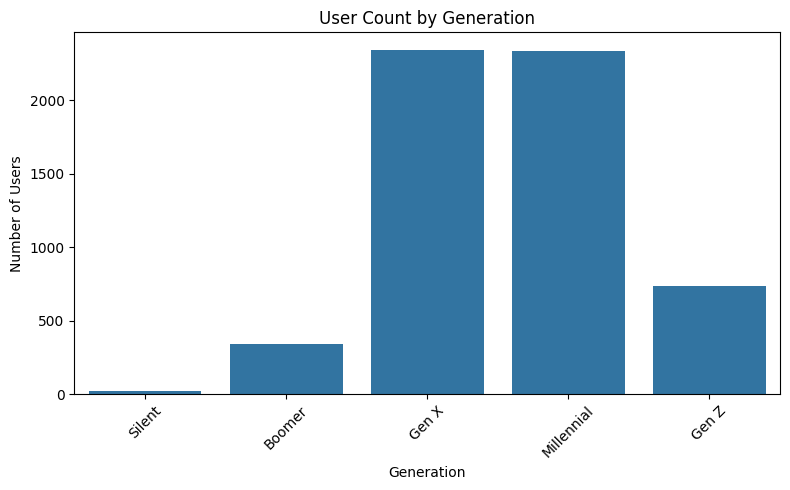

In [22]:
gen_order = ['Silent', 'Boomer', 'Gen X', 'Millennial', 'Gen Z']
gen_counts = df['generation'].value_counts().reindex(gen_order)
# Create barplot to visualize the distribution of users/generation
plt.figure(figsize=(8, 5))
sns.barplot(x=gen_counts.index, y=gen_counts.values)

plt.title('User Count by Generation')
plt.xlabel('Generation')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

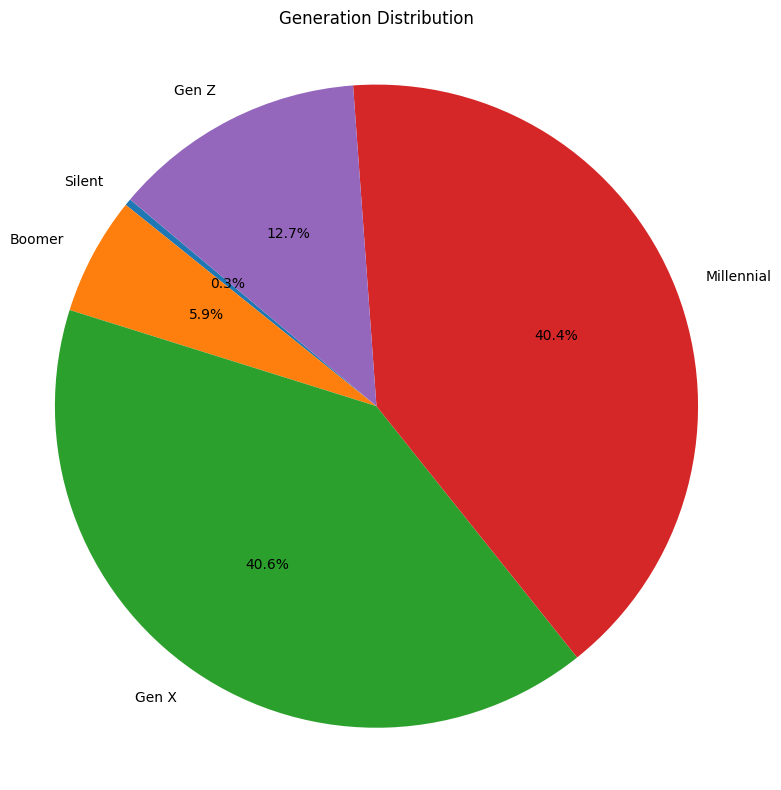

In [23]:
#Distribution of Generation Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(gen_counts, labels=gen_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Generation Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

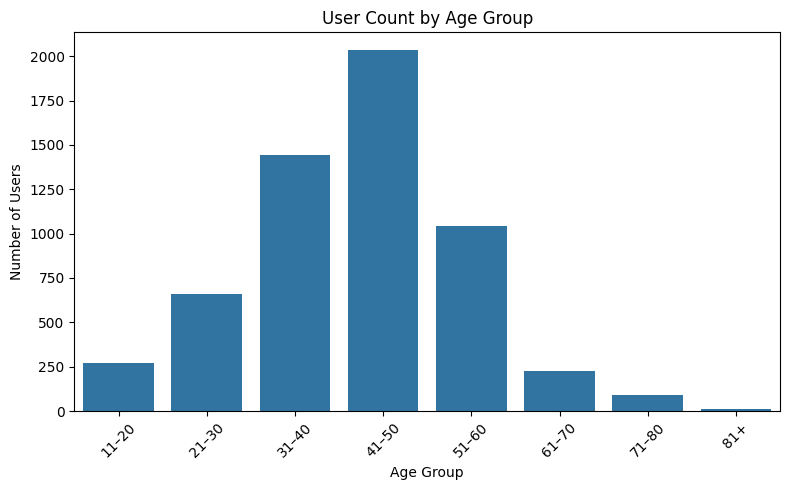

In [24]:
age_group_counts = df['age_group'].value_counts()

# Create barplot for user count per age group
plt.figure(figsize=(8, 5))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)

plt.title('User Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

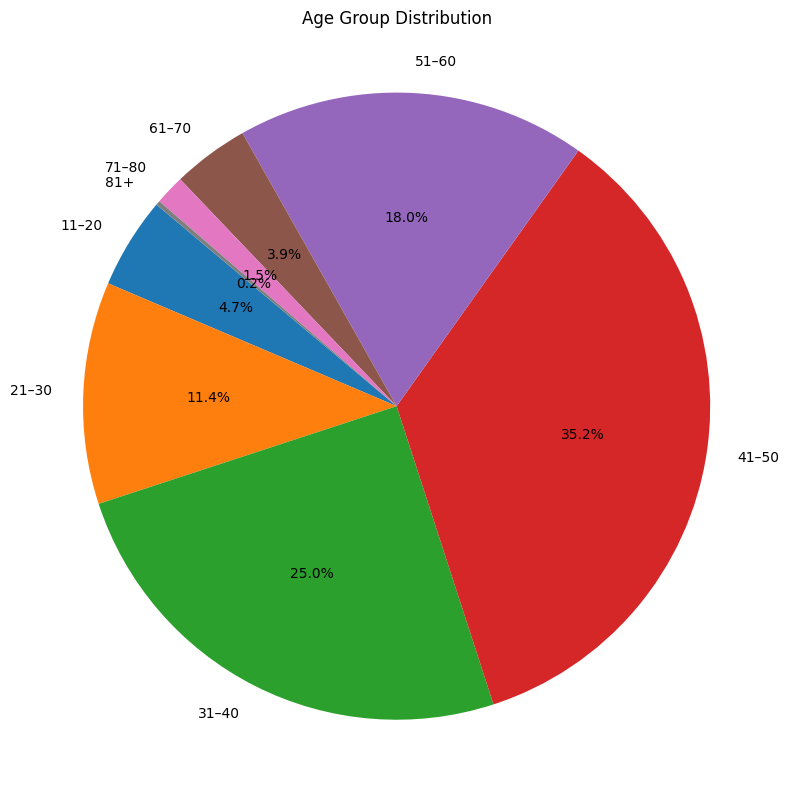

In [25]:
age_group_counts = df['age_group'].value_counts().sort_index()

# Plot a pie chart for age group distribution
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Age Group Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

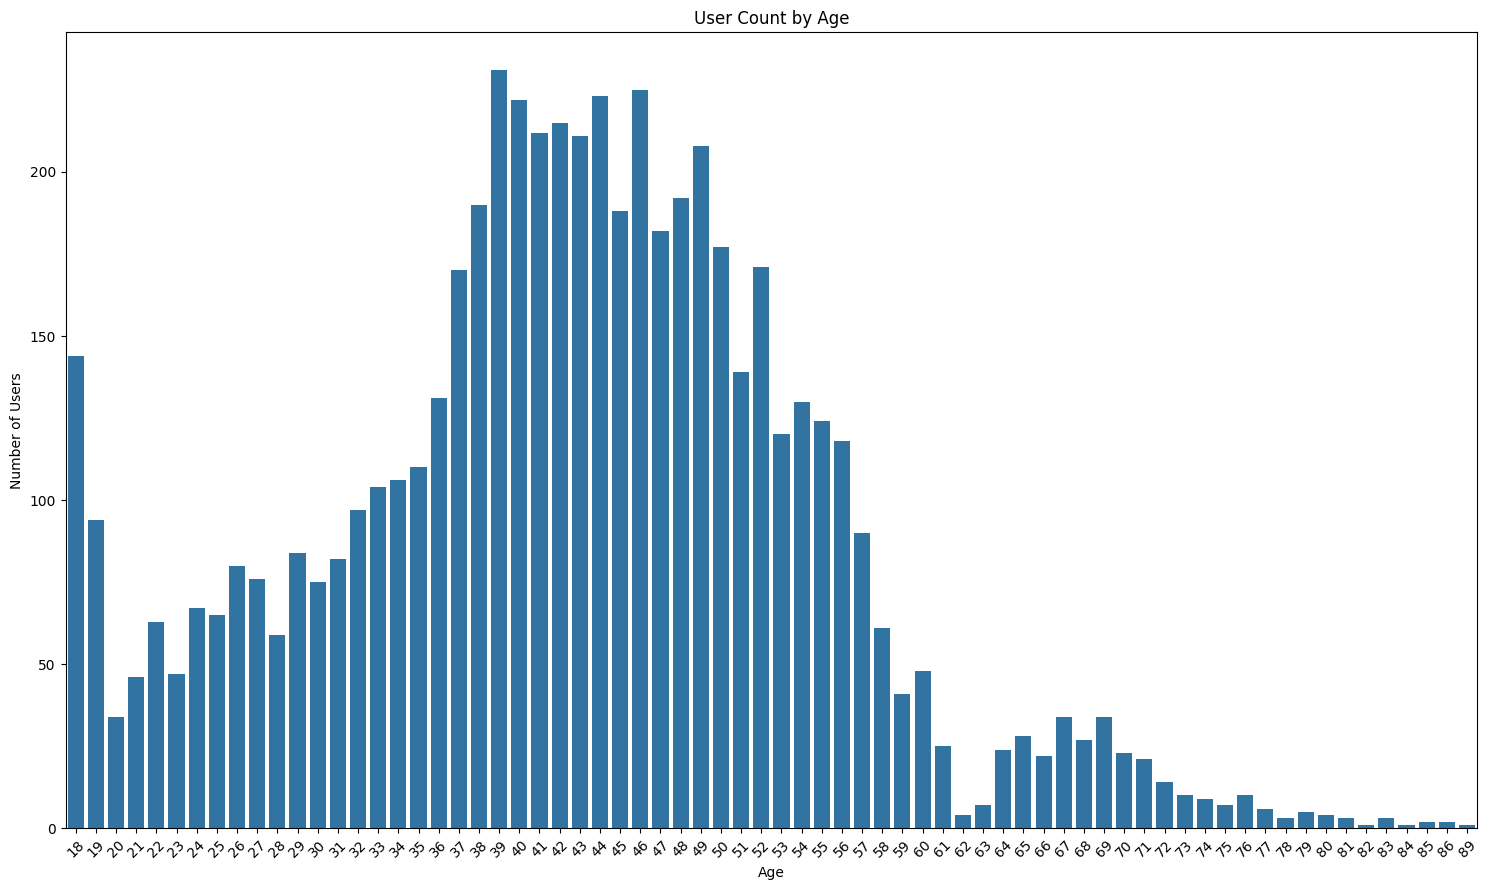

In [26]:
age_counts = df['age'].value_counts()

plt.figure(figsize=(15, 9))
sns.barplot(x=age_counts.index, y=age_counts.values)

plt.title('User Count by Age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
df[df['age'] > 65].shape[0]

242

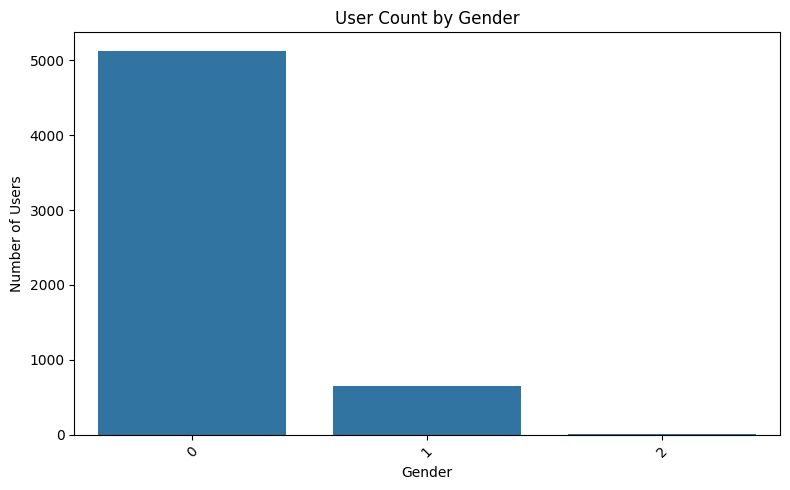

In [28]:
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=gender_counts.index, y=gender_counts.values)

plt.title('User Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#interesting distribution of gender

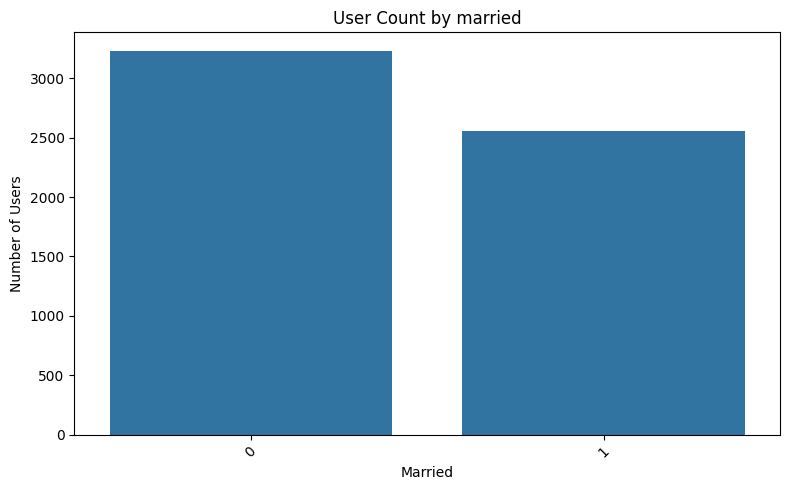

In [29]:
married_counts = df['married'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=married_counts.index, y=married_counts.values)

plt.title('User Count by married')
plt.xlabel('Married')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

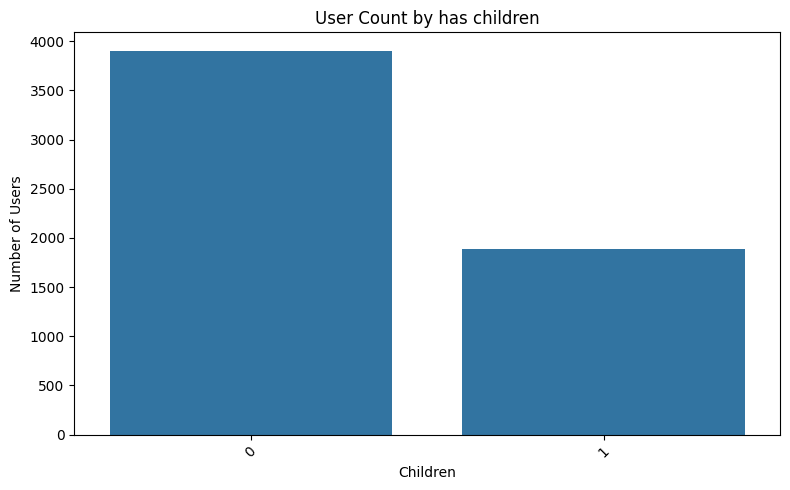

In [30]:
has_children_counts = df['has_children'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=has_children_counts.index, y=has_children_counts.values)

plt.title('User Count by has children')
plt.xlabel('Children')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
df.has_children.value_counts()

,count
has_children,
0,3896
1,1886


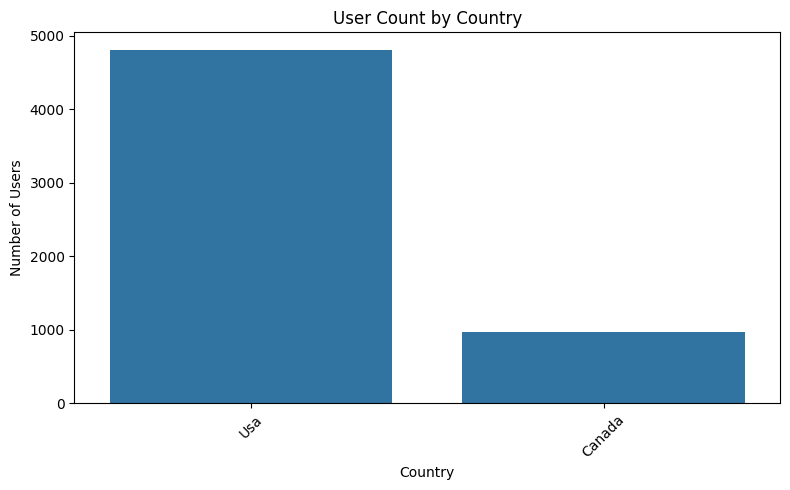

In [32]:
country_counts = df['home_country'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=country_counts.index, y=country_counts.values)

plt.title('User Count by Country')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
df.isna().sum()

,0
user_id,0
birthdate,0
gender,0
married,0
has_children,0
home_country,0
home_city,0
home_airport,0
home_airport_lat,0
home_airport_lon,0


In [34]:
df.duplicated().sum()

np.int64(0)

# **Hotels**

In [35]:
df2 = pd.read_csv('/content/drive/My Drive/Mastery Project/hotels.csv')

In [36]:
df2.head()

,trip_id,hotel_name,nights,rooms,check_in_time,check_out_time,hotel_per_room_usd
0,582979-5475b9940ee240bf9328a0cc0bc9900c,NH Hotel - ottawa,6,1,2023-03-31 13:32:21.030000,2023-04-07 11:00:00.000000,110
1,514785-863ac3b4eb984f1eb226d67955623a5d,Choice Hotels - montreal,3,1,2023-06-21 20:06:24.300000,2023-06-25 11:00:00.000000,87
2,588386-233db0f627cf4aaaaeaa9a632daa5ec4,Accor - philadelphia,1,1,2023-04-04 10:43:44.175000,2023-04-05 11:00:00.000000,126
3,600395-79e934e3dcf2462587a0beffbebd6783,Marriott - memphis,1,2,2023-04-21 15:58:28.200000,2023-04-23 11:00:00.000000,153
4,474120-a87f749cf54b4f4ca9262d07080a06b2,Accor - san francisco,4,2,2023-02-02 14:18:11.205000,2023-02-07 11:00:00.000000,346


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13772 entries, 0 to 13771
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   trip_id             13772 non-null  object
 1   hotel_name          13772 non-null  object
 2   nights              13772 non-null  int64 
 3   rooms               13772 non-null  int64 
 4   check_in_time       13772 non-null  object
 5   check_out_time      13772 non-null  object
 6   hotel_per_room_usd  13772 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 753.3+ KB


In [38]:
df2.duplicated().sum()

np.int64(0)

In [39]:
df2.describe() #we see nights have negative values - needs to be investigated

,nights,rooms,hotel_per_room_usd
count,13772.000000,13772.000000,13772.000000
mean,3.616250,1.195396,178.147401
std,3.758377,0.499596,119.019998
min,-2.000000,1.000000,17.000000
25%,1.000000,1.000000,99.000000
50%,2.000000,1.000000,148.000000
75%,5.000000,1.000000,223.000000
max,43.000000,4.000000,1376.000000


In [40]:
df2[df2['nights'] < 0] #we see 101 rows with negative nights

,trip_id,hotel_name,nights,rooms,check_in_time,check_out_time,hotel_per_room_usd
93,535155-b110abfe2ffa4fd3a6d7ef43084b4a56,Fairmont - seattle,-1,1,2023-02-04 12:58:18.750000,2023-02-04 11:00:00.000000,144
275,594503-6a3c8903cac74c4d99827c11e29ccee2,Choice Hotels - oklahoma city,-1,1,2023-04-12 12:22:57.855000,2023-04-12 11:00:00.000000,262
331,514275-349724de73bf4991a7779abe5024b3c0,Banyan Tree - edmonton,-1,2,2023-03-05 15:39:45.180000,2023-03-05 11:00:00.000000,246
386,550752-6d33b966ac784a74869c45b97644a5d0,Best Western - los angeles,-1,1,2023-02-05 22:15:56.520000,2023-02-05 11:00:00.000000,17
566,515182-336047f07c0e43729bd04381329f9678,Banyan Tree - quebec,-1,1,2023-03-25 12:18:46.935000,2023-03-25 11:00:00.000000,237
...,...,...,...,...,...,...,...
12332,699411-760a0e67841c4c4f8d22aa88102386ab,Four Seasons - new york,-1,2,2023-05-20 13:46:41.160000,2023-05-20 11:00:00.000000,328
12738,523273-70681fe70d5c4f0293ccb987f8c4fc4b,Fairmont - san antonio,-1,1,2023-01-20 19:18:09.990000,2023-01-20 11:00:00.000000,57
13132,544747-5c3a9226b2e8436aaaf2139443c3ac7d,Rosewood - charlotte,-1,1,2023-01-27 21:33:36.180000,2023-01-27 11:00:00.000000,378
13145,524211-60b3eb9ff20b48fd9011064718a0d007,NH Hotel - ottawa,-1,1,2023-04-29 14:40:43.050000,2023-04-29 11:00:00.000000,245


In [41]:
df2['check_in_time'] = pd.to_datetime(df2['check_in_time'], errors='coerce')
df2['check_out_time'] = pd.to_datetime(df2['check_out_time'], errors='coerce') #parsing the timedates

In [42]:
df2['new_nights'] = (df2['check_out_time'].dt.floor('D') - df2['check_in_time'].dt.floor('D')).dt.days #calculate the column new_nights with the timestamps

In [43]:
comparison = pd.concat([
    df2['nights'].value_counts().rename('nights'),
    df2['new_nights'].value_counts().rename('new_nights')
], axis=1).fillna(0).astype(int)

comparison.sort_index(inplace=True)
print(comparison) #using the nights calculations the overall distribution of nights changed dramatically

     nights  new_nights
-2        1           0
-1      100          26
 0     1158         389
 1     3018        1701
 2     2693        3039
 3     1882        2466
 4     1309        1763
 5      856        1185
 6      642         800
 7      455         574
 8      370         396
 9      271         333
 10     219         234
 11     185         200
 12     139         166
 13     104         100
 14      78          92
 15      68          66
 16      45          54
 17      41          40
 18      28          37
 19      13           9
 20      18          21
 21      20          18
 22      11          14
 23       8           7
 24       4           6
 25       6           5
 26       3           4
 27       5           4
 28       3           4
 29       4           3
 30       2           3
 31       2           2
 32       3           2
 33       1           1
 34       3           3
 35       1           2
 40       1           1
 42       1           1
 43       1     

In [44]:
df2.drop(df2[df2['new_nights'] < 0].index, inplace=True) #drop all remaining nights below 0

In [45]:
df2['nights'] = df2['new_nights'] #equalizing both columns

In [46]:
comparison = pd.concat([
    df2['nights'].value_counts().rename('nights'),
    df2['new_nights'].value_counts().rename('new_nights')
], axis=1).fillna(0).astype(int)

comparison.sort_index(inplace=True)
print(comparison) #compare again for testing

    nights  new_nights
0      389         389
1     1701        1701
2     3039        3039
3     2466        2466
4     1763        1763
5     1185        1185
6      800         800
7      574         574
8      396         396
9      333         333
10     234         234
11     200         200
12     166         166
13     100         100
14      92          92
15      66          66
16      54          54
17      40          40
18      37          37
19       9           9
20      21          21
21      18          18
22      14          14
23       7           7
24       6           6
25       5           5
26       4           4
27       4           4
28       4           4
29       3           3
30       3           3
31       2           2
32       2           2
33       1           1
34       3           3
35       2           2
40       1           1
42       1           1
43       1           1


In [47]:
df2.drop(columns='new_nights', inplace=True) #keep only the original nights column

In [48]:
df2[df2['nights'] == 0].sample(5) #checking whats going on with the nights = 0 rows

,trip_id,hotel_name,nights,rooms,check_in_time,check_out_time,hotel_per_room_usd
6333,571819-7093d36f8a004e0587000a681aa4d9fd,Hyatt - san jose,0,1,2023-04-26 09:37:10.740,2023-04-26 11:00:00,134
4504,569472-5fbf3d3c7441423cb66bf1b4bcbc5b94,Hilton - chicago,0,1,2023-05-02 11:22:09.525,2023-05-02 11:00:00,253
5901,512463-4f25e637f1964761af0d10707c591516,Starwood - san antonio,0,2,2023-01-29 11:34:58.980,2023-01-29 11:00:00,384
9797,644467-2ba9834017de455cb2e2530661451535,Best Western - nashville,0,4,2023-05-02 09:55:07.410,2023-05-02 11:00:00,169
6291,611954-efe02e6000f342cf91fe69860eef7881,Crowne Plaza - chicago,0,1,2023-07-21 09:30:17.010,2023-07-21 11:00:00,84


In [49]:
df2['duration_hours'] = (df2['check_out_time'] - df2['check_in_time']).dt.total_seconds() / 3600
df2[df2['nights'] == 0][['check_in_time', 'check_out_time', 'duration_hours']].head(10)
#negative duration and very short stays. I need to investigate this for business trips and timezone issues. Could be trips where someone stayed for some hours
#and since the checkouttime is standardized. to 11 this can get lost. Might be short business trips

,check_in_time,check_out_time,duration_hours
93,2023-02-04 12:58:18.750,2023-02-04 11:00:00,-1.971875
151,2023-04-18 10:28:04.890,2023-04-18 11:00:00,0.531975
186,2023-01-26 10:09:52.155,2023-01-26 11:00:00,0.835512
275,2023-04-12 12:22:57.855,2023-04-12 11:00:00,-1.382737
331,2023-03-05 15:39:45.180,2023-03-05 11:00:00,-4.662550
341,2023-01-29 11:34:30.405,2023-01-29 11:00:00,-0.575113
353,2023-07-04 11:50:21.525,2023-07-04 11:00:00,-0.839313
386,2023-02-05 22:15:56.520,2023-02-05 11:00:00,-11.265700
476,2023-03-15 10:38:05.865,2023-03-15 11:00:00,0.365038
566,2023-03-25 12:18:46.935,2023-03-25 11:00:00,-1.313038


In [50]:
df2.shape

(13746, 8)

In [51]:
df2.head()

,trip_id,hotel_name,nights,rooms,check_in_time,check_out_time,hotel_per_room_usd,duration_hours
0,582979-5475b9940ee240bf9328a0cc0bc9900c,NH Hotel - ottawa,7,1,2023-03-31 13:32:21.030,2023-04-07 11:00:00,110,165.460825
1,514785-863ac3b4eb984f1eb226d67955623a5d,Choice Hotels - montreal,4,1,2023-06-21 20:06:24.300,2023-06-25 11:00:00,87,86.893250
2,588386-233db0f627cf4aaaaeaa9a632daa5ec4,Accor - philadelphia,1,1,2023-04-04 10:43:44.175,2023-04-05 11:00:00,126,24.271062
3,600395-79e934e3dcf2462587a0beffbebd6783,Marriott - memphis,2,2,2023-04-21 15:58:28.200,2023-04-23 11:00:00,153,43.025500
4,474120-a87f749cf54b4f4ca9262d07080a06b2,Accor - san francisco,5,2,2023-02-02 14:18:11.205,2023-02-07 11:00:00,346,116.696888


In [52]:
(df2 == 0).sum() #checking for more columns with 0 as a value before calculating other columns

,0
trip_id,0
hotel_name,0
nights,389
rooms,0
check_in_time,0
check_out_time,0
hotel_per_room_usd,0
duration_hours,0


In [53]:
df2['price'] = df2['hotel_per_room_usd'] * df2['rooms'] * df2['nights'] #calculating the total price. Since there are no NaN trip_ids this is safe to do

In [54]:
df2['is_weekend_checkin'] = df2['check_in_time'].dt.dayofweek >= 4  # 4 = Friday (I include that to gain a broader understanding of weekend behavior) 5 = Saturday, 6 = Sunday

In [55]:
def get_season(month):
    if month in [12, 1, 2]: return 'Winter'
    elif month in [3, 4, 5]: return 'Spring'
    elif month in [6, 7, 8]: return 'Summer'
    else: return 'Autumn'

df2['season'] = df2['check_in_time'].dt.month.apply(get_season) #check season behavior

In [56]:
df2.head()

,trip_id,hotel_name,nights,rooms,check_in_time,check_out_time,hotel_per_room_usd,duration_hours,price,is_weekend_checkin,season
0,582979-5475b9940ee240bf9328a0cc0bc9900c,NH Hotel - ottawa,7,1,2023-03-31 13:32:21.030,2023-04-07 11:00:00,110,165.460825,770,True,Spring
1,514785-863ac3b4eb984f1eb226d67955623a5d,Choice Hotels - montreal,4,1,2023-06-21 20:06:24.300,2023-06-25 11:00:00,87,86.893250,348,False,Summer
2,588386-233db0f627cf4aaaaeaa9a632daa5ec4,Accor - philadelphia,1,1,2023-04-04 10:43:44.175,2023-04-05 11:00:00,126,24.271062,126,False,Spring
3,600395-79e934e3dcf2462587a0beffbebd6783,Marriott - memphis,2,2,2023-04-21 15:58:28.200,2023-04-23 11:00:00,153,43.025500,612,True,Spring
4,474120-a87f749cf54b4f4ca9262d07080a06b2,Accor - san francisco,5,2,2023-02-02 14:18:11.205,2023-02-07 11:00:00,346,116.696888,3460,False,Winter


In [57]:
df2['season'].value_counts()

,count
season,
Spring,6251
Winter,4912
Summer,2522
Autumn,61


In [58]:
df2[['hotel_brand', 'hotel_city']] = df2['hotel_name'].str.split(' - ', expand=True) #get the hotel brand to see if there are people who prefer luxury

In [59]:
df2['hotel_city'] = df2['hotel_city'].str.title()

In [60]:
df2['is_weekend_checkin'] = df2['is_weekend_checkin'].astype(int)

In [61]:
df2

,trip_id,hotel_name,nights,rooms,check_in_time,check_out_time,hotel_per_room_usd,duration_hours,price,is_weekend_checkin,season,hotel_brand,hotel_city
0,582979-5475b9940ee240bf9328a0cc0bc9900c,NH Hotel - ottawa,7,1,2023-03-31 13:32:21.030,2023-04-07 11:00:00,110,165.460825,770,1,Spring,NH Hotel,Ottawa
1,514785-863ac3b4eb984f1eb226d67955623a5d,Choice Hotels - montreal,4,1,2023-06-21 20:06:24.300,2023-06-25 11:00:00,87,86.893250,348,0,Summer,Choice Hotels,Montreal
2,588386-233db0f627cf4aaaaeaa9a632daa5ec4,Accor - philadelphia,1,1,2023-04-04 10:43:44.175,2023-04-05 11:00:00,126,24.271062,126,0,Spring,Accor,Philadelphia
3,600395-79e934e3dcf2462587a0beffbebd6783,Marriott - memphis,2,2,2023-04-21 15:58:28.200,2023-04-23 11:00:00,153,43.025500,612,1,Spring,Marriott,Memphis
4,474120-a87f749cf54b4f4ca9262d07080a06b2,Accor - san francisco,5,2,2023-02-02 14:18:11.205,2023-02-07 11:00:00,346,116.696888,3460,0,Winter,Accor,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13767,583623-70097bf1d1334cfb891ac2bd09f448ae,Shangri-La - montreal,4,1,2023-02-23 17:25:07.185,2023-02-27 11:00:00,142,89.581338,568,0,Winter,Shangri-La,Montreal
13768,512377-acf089357a6b497d91eda34bb532578d,Marriott - washington,6,1,2023-04-02 12:25:51.465,2023-04-08 11:00:00,446,142.569037,2676,1,Spring,Marriott,Washington
13769,598533-40848e5db09e46aa8f56c0c3ccdefb2d,Hyatt - macau,12,1,2024-01-24 09:54:31.635,2024-02-05 11:00:00,114,289.091212,1368,0,Winter,Hyatt,Macau
13770,497042-fa163de72e234eaf9c9bc8b477fbf66a,Hyatt - san antonio,2,1,2023-04-13 11:40:58.350,2023-04-15 11:00:00,103,47.317125,206,0,Spring,Hyatt,San Antonio


# **Visualizations for Hotel**

In [62]:
num_col = ['nights', 'rooms', 'hotel_per_room_usd', 'price', 'is_weekend_checkin']

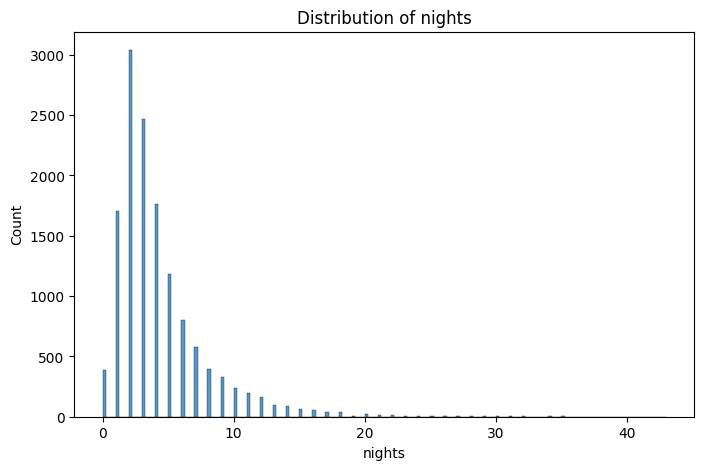

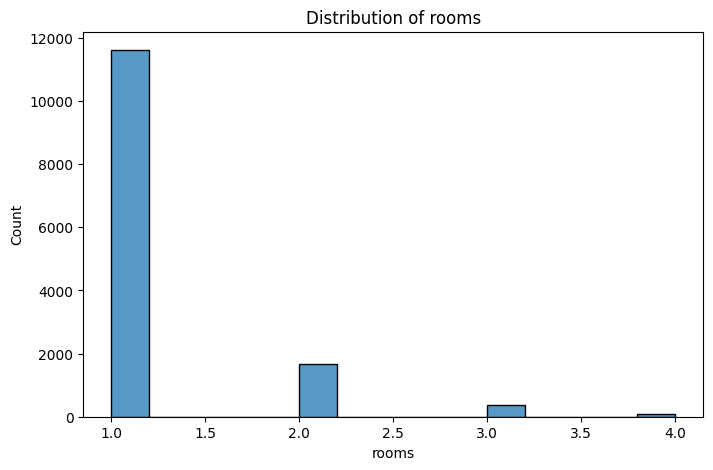

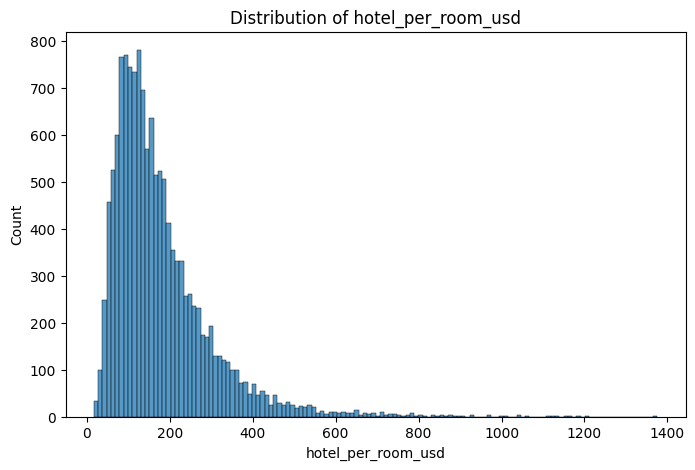

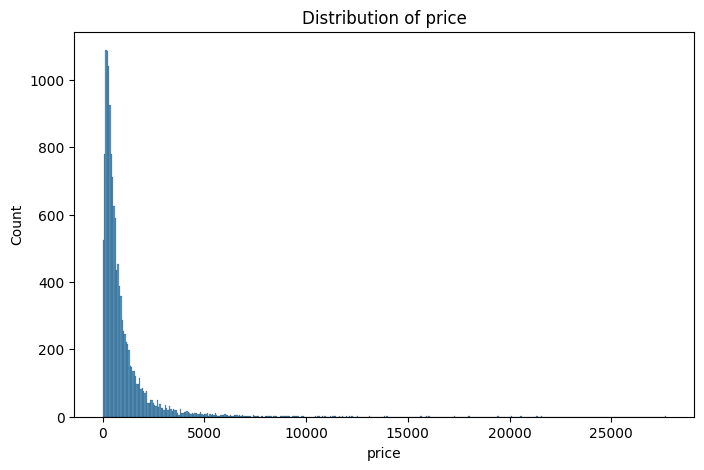

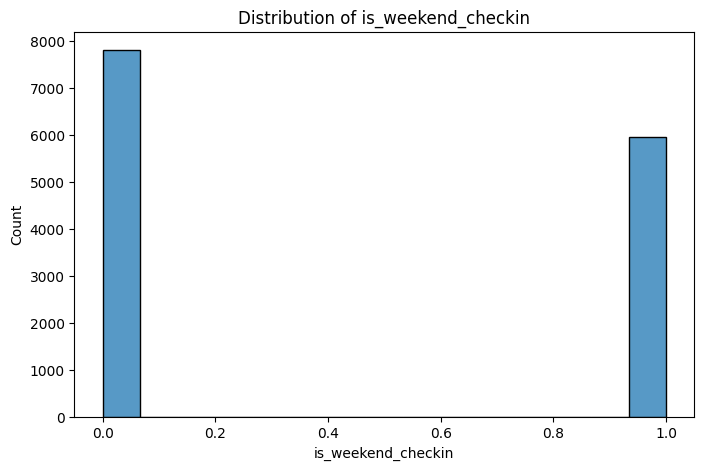

In [63]:
for col in num_col:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df2, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt
    #striking are outliers in some of the columns. I will investigate those further to see if they hold value of some sort

In [64]:
df2['log_price'] = np.log1p(df2['price'])  # Use this for ML

Text(0, 0.5, 'Count')

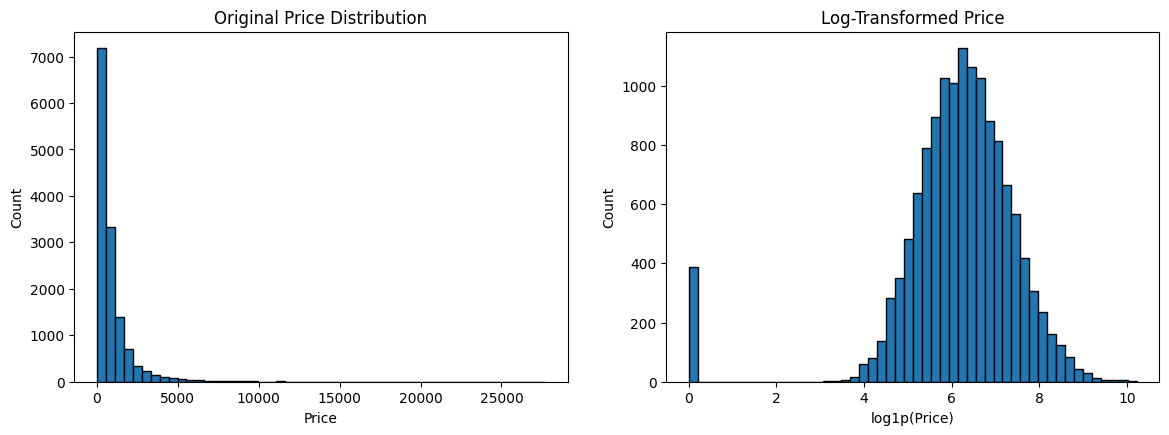

In [65]:
#visualize the original and log scaled plots
plt.figure(figsize=(14, 10))

# 1. Original price
plt.subplot(2, 2, 1)
plt.hist(df2['price'], bins=50, edgecolor='black')
plt.title('Original Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')

# 2. Log-transformed price
plt.subplot(2, 2, 2)
plt.hist(df2['log_price'], bins=50, edgecolor='black')
plt.title('Log-Transformed Price')
plt.xlabel('log1p(Price)')
plt.ylabel('Count')

#definetely looks way better

Text(0, 0.5, 'Bookings')

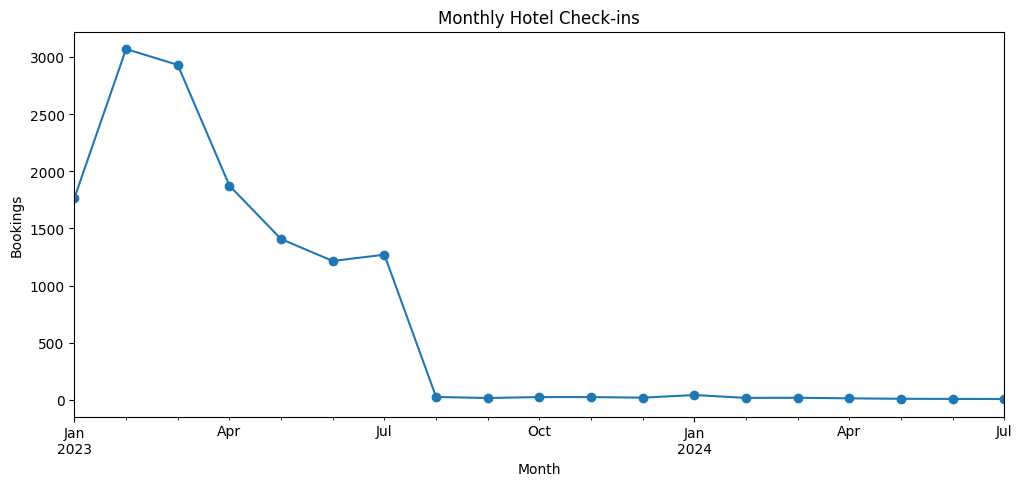

In [66]:
monthly_checkins = df2.groupby(df2['check_in_time'].dt.to_period('M')).size()
monthly_checkins.plot(figsize=(12, 5), marker='o')
plt.title('Monthly Hotel Check-ins')
plt.xlabel('Month')
plt.ylabel('Bookings')
#the data seems to only contain bookings for 2023

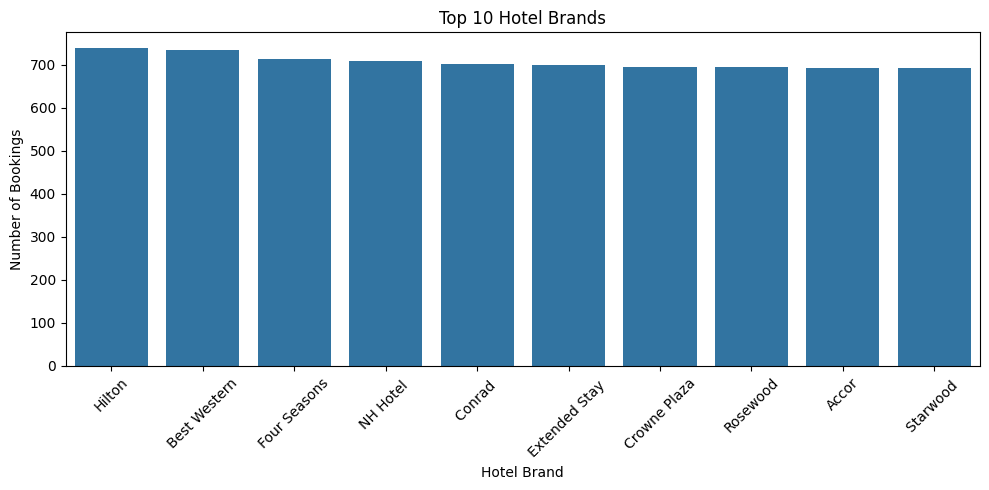

In [67]:

top_brands = df2['hotel_brand'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.title('Top 10 Hotel Brands')
plt.xlabel('Hotel Brand')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


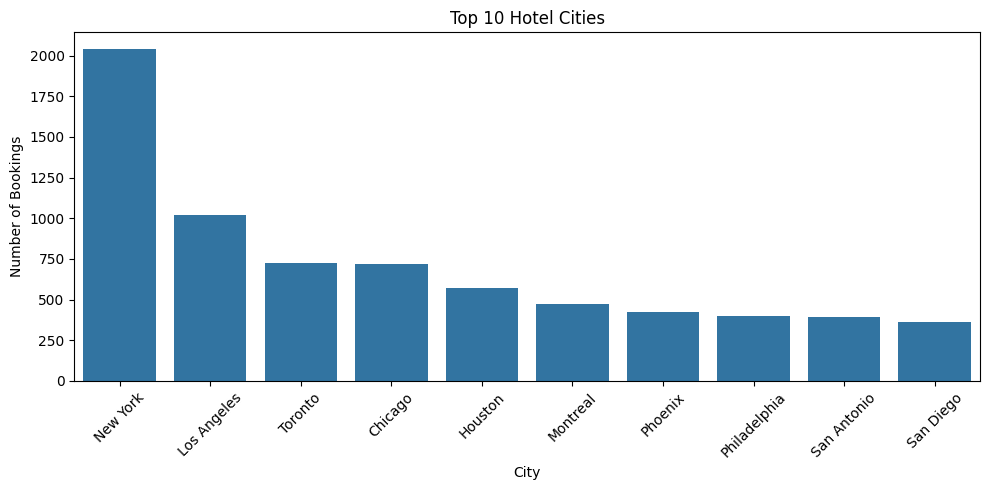

In [68]:
top_cities = df2['hotel_city'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top 10 Hotel Cities')
plt.xlabel('City')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [69]:
df2.isna().sum()

,0
trip_id,0
hotel_name,0
nights,0
rooms,0
check_in_time,0
check_out_time,0
hotel_per_room_usd,0
duration_hours,0
price,0
is_weekend_checkin,0


In [70]:
df2.duplicated().sum()

np.int64(0)

# **Flights**

In [71]:
df3 = pd.read_csv('/content/drive/My Drive/Mastery Project/flights.csv')

In [72]:
df3.head() #like in users i have airport data available. I could use this to create some sort of distance metric

,trip_id,origin_airport,destination,destination_airport,seats,return_flight_booked,departure_time,return_time,checked_bags,trip_airline,destination_airport_lat,destination_airport_lon,base_fare_usd
0,582979-5475b9940ee240bf9328a0cc0bc9900c,RNO,ottawa,YOW,1,True,2023-03-31 07:00:00.000000,2023-04-07 07:00:00.000000,1,Air Canada,45.323,-75.669,657.64
1,514785-863ac3b4eb984f1eb226d67955623a5d,FTW,montreal,YHU,1,False,2023-06-21 15:00:00.000000,NaN,0,Delta Air Lines,45.517,-73.417,221.83
2,588386-233db0f627cf4aaaaeaa9a632daa5ec4,CLE,philadelphia,PHL,1,True,2023-04-04 08:00:00.000000,2023-04-06 08:00:00.000000,2,American Airlines,39.872,-75.241,106.00
3,600395-79e934e3dcf2462587a0beffbebd6783,HOU,memphis,MEM,2,True,2023-04-21 13:00:00.000000,2023-04-24 13:00:00.000000,0,Delta Air Lines,35.042,-89.977,320.19
4,474120-a87f749cf54b4f4ca9262d07080a06b2,YQB,san francisco,SFO,2,True,2023-02-02 07:00:00.000000,2023-02-07 07:00:00.000000,0,Alaska Airlines,37.619,-122.375,1507.83


In [73]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13193 entries, 0 to 13192
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_id                  13193 non-null  object 
 1   origin_airport           13193 non-null  object 
 2   destination              13193 non-null  object 
 3   destination_airport      13193 non-null  object 
 4   seats                    13193 non-null  int64  
 5   return_flight_booked     13193 non-null  bool   
 6   departure_time           13193 non-null  object 
 7   return_time              12620 non-null  object 
 8   checked_bags             13193 non-null  int64  
 9   trip_airline             13193 non-null  object 
 10  destination_airport_lat  13193 non-null  float64
 11  destination_airport_lon  13193 non-null  float64
 12  base_fare_usd            13193 non-null  float64
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 1.2+ MB


In [74]:
df3.describe()

,seats,checked_bags,destination_airport_lat,destination_airport_lon,base_fare_usd
count,13193.000000,13193.000000,13193.000000,13193.000000,13193.000000
mean,1.200106,0.584477,38.708329,-90.471100,489.114071
std,0.552416,0.653633,6.642478,29.068945,675.795966
min,1.000000,0.000000,-37.008000,-157.927000,2.410000
25%,1.000000,0.000000,33.942000,-112.383000,198.600000
50%,1.000000,1.000000,39.872000,-87.752000,377.820000
75%,1.000000,1.000000,42.409000,-75.669000,590.590000
max,8.000000,8.000000,55.972000,174.792000,14466.330000


In [75]:
df3.isna().sum()

,0
trip_id,0
origin_airport,0
destination,0
destination_airport,0
seats,0
return_flight_booked,0
departure_time,0
return_time,573
checked_bags,0
trip_airline,0


In [76]:
df3.duplicated().sum()

np.int64(0)

In [77]:
df3['departure_time'] = pd.to_datetime(df3['departure_time'])
df3['return_time'] = pd.to_datetime(df3['return_time'])

In [78]:
df3['origin_airport'].value_counts().head(10)

,count
origin_airport,
LGA,835
JFK,776
LAX,698
DAL,265
YYC,233
IND,198
SJC,193
BNA,192
AUS,190


In [79]:
df3['destination_airport'].value_counts().head(10)

,count
destination_airport,
JFK,944
LGA,924
LSQ,514
LAX,469
DAL,350
YYC,331
IND,248
AUS,240
YOW,240


In [80]:
df3['destination'].value_counts().head(10)

,count
destination,
new york,1868
los angeles,983
toronto,707
chicago,677
houston,545
montreal,428
phoenix,410
philadelphia,380
san antonio,365


In [81]:
df3['checked_bags'].value_counts()

,count
checked_bags,
0,6395
1,6084
2,585
3,84
4,26
5,15
6,3
8,1


In [82]:
df3['seats'].value_counts()

,count
seats,
1,11255
2,1426
3,367
4,116
5,16
6,11
7,1
8,1


In [83]:
df3['return_flight_booked'].value_counts()

,count
return_flight_booked,
True,12620
False,573


In [84]:
df3['trip_airline'].value_counts().head(10)

,count
trip_airline,
Delta Air Lines,2013
American Airlines,1997
United Airlines,1776
Southwest Airlines,1061
Ryanair,877
JetBlue Airways,756
AirTran Airways,611
Allegiant Air,603
Air Canada,553


In [85]:
df3['price'] = df3['base_fare_usd'] * df3['seats']

In [86]:
df3.head()

,trip_id,origin_airport,destination,destination_airport,seats,return_flight_booked,departure_time,return_time,checked_bags,trip_airline,destination_airport_lat,destination_airport_lon,base_fare_usd,price
0,582979-5475b9940ee240bf9328a0cc0bc9900c,RNO,ottawa,YOW,1,True,2023-03-31 07:00:00,2023-04-07 07:00:00,1,Air Canada,45.323,-75.669,657.64,657.64
1,514785-863ac3b4eb984f1eb226d67955623a5d,FTW,montreal,YHU,1,False,2023-06-21 15:00:00,NaT,0,Delta Air Lines,45.517,-73.417,221.83,221.83
2,588386-233db0f627cf4aaaaeaa9a632daa5ec4,CLE,philadelphia,PHL,1,True,2023-04-04 08:00:00,2023-04-06 08:00:00,2,American Airlines,39.872,-75.241,106.00,106.00
3,600395-79e934e3dcf2462587a0beffbebd6783,HOU,memphis,MEM,2,True,2023-04-21 13:00:00,2023-04-24 13:00:00,0,Delta Air Lines,35.042,-89.977,320.19,640.38
4,474120-a87f749cf54b4f4ca9262d07080a06b2,YQB,san francisco,SFO,2,True,2023-02-02 07:00:00,2023-02-07 07:00:00,0,Alaska Airlines,37.619,-122.375,1507.83,3015.66


In [87]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13193 entries, 0 to 13192
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   trip_id                  13193 non-null  object        
 1   origin_airport           13193 non-null  object        
 2   destination              13193 non-null  object        
 3   destination_airport      13193 non-null  object        
 4   seats                    13193 non-null  int64         
 5   return_flight_booked     13193 non-null  bool          
 6   departure_time           13193 non-null  datetime64[ns]
 7   return_time              12620 non-null  datetime64[ns]
 8   checked_bags             13193 non-null  int64         
 9   trip_airline             13193 non-null  object        
 10  destination_airport_lat  13193 non-null  float64       
 11  destination_airport_lon  13193 non-null  float64       
 12  base_fare_usd            13193 n

# **Visualizations for Flights**

In [88]:
num_cols3 = ['seats', 'checked_bags', 'price', 'return_flight_booked']  # Exclude 'return_flight_booked' if treating as category

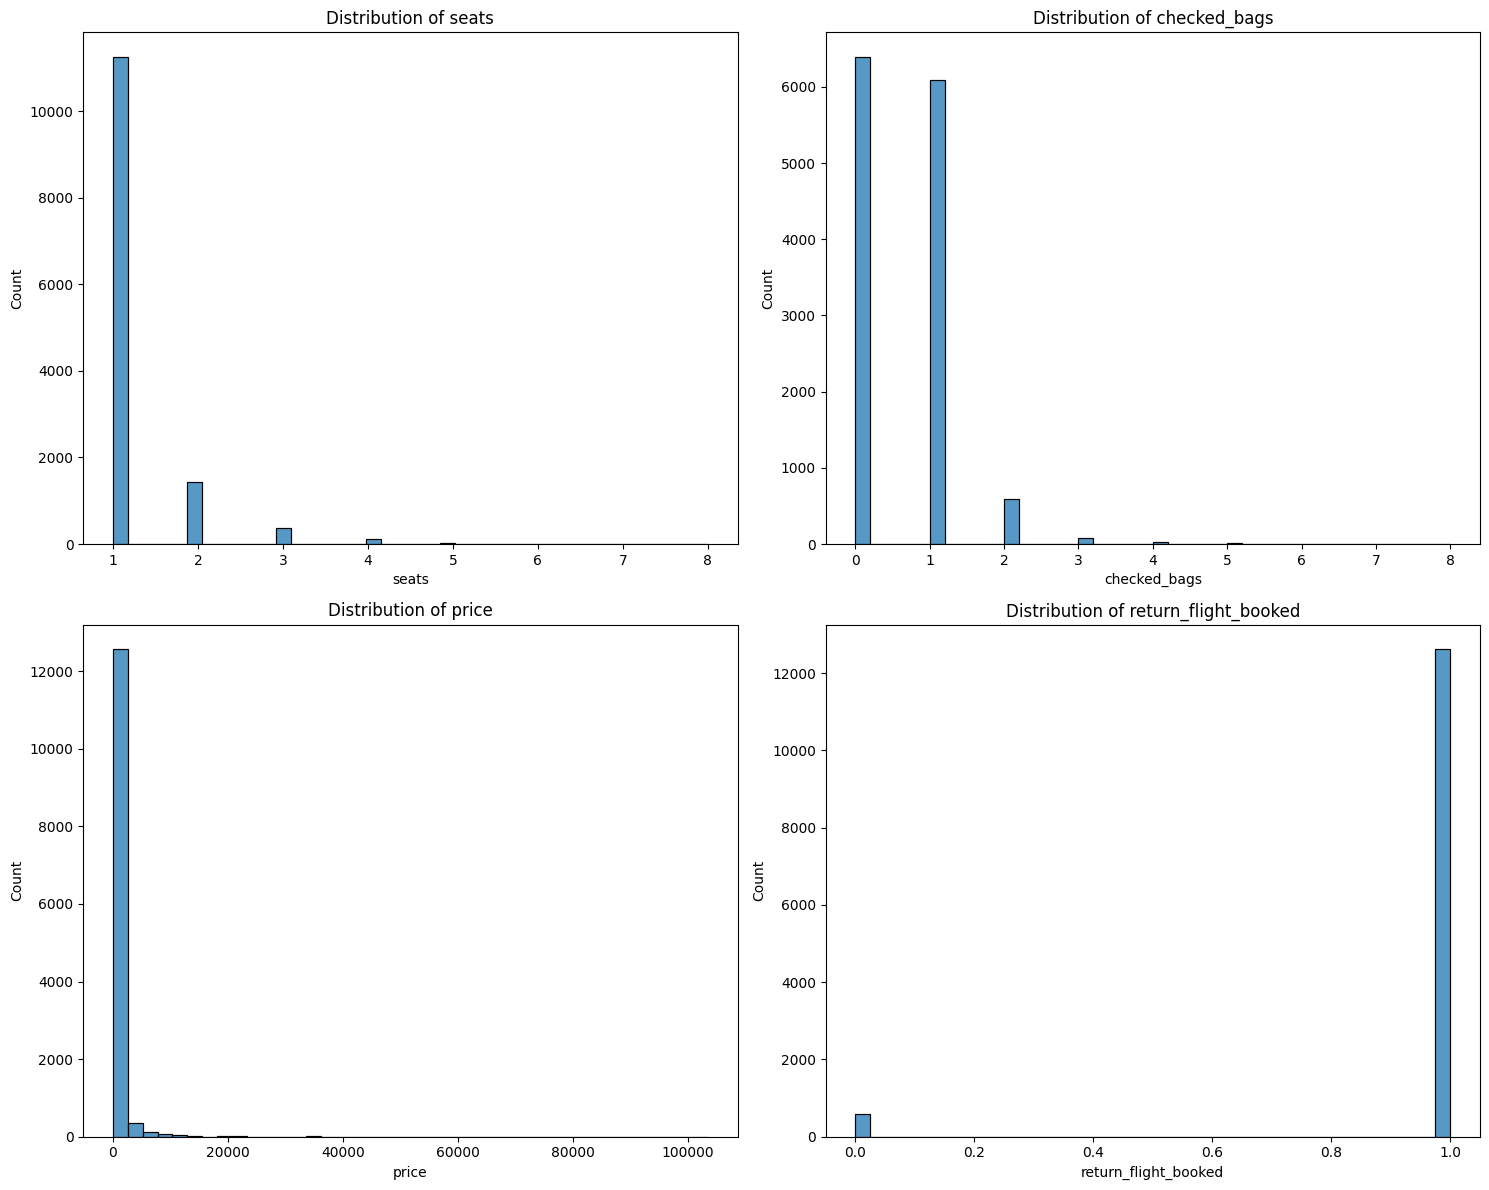

In [89]:
plt.figure(figsize=(15, 12))

for i, col in enumerate(num_cols3, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df3[col], bins=40, kde=False, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [90]:
df3['log_price'] = np.log1p(df3['price'])

Text(0, 0.5, 'Count')

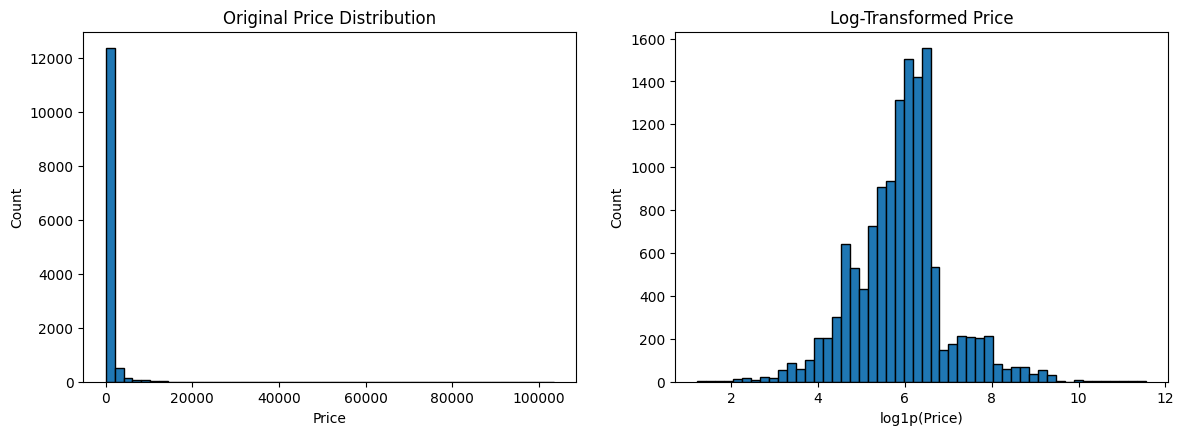

In [91]:
#visualize the original and log scaled plots
plt.figure(figsize=(14, 10))

# 1. Original price
plt.subplot(2, 2, 1)
plt.hist(df3['price'], bins=50, edgecolor='black')
plt.title('Original Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')

# 2. Log-transformed price
plt.subplot(2, 2, 2)
plt.hist(df3['log_price'], bins=50, edgecolor='black')
plt.title('Log-Transformed Price')
plt.xlabel('log1p(Price)')
plt.ylabel('Count')

#definetely looks way better

In [92]:
df3.describe()

,seats,departure_time,return_time,checked_bags,destination_airport_lat,destination_airport_lon,base_fare_usd,price,log_price
count,13193.000000,13193,12620,13193.000000,13193.000000,13193.000000,13193.000000,13193.000000,13193.000000
mean,1.200106,2023-04-11 10:41:27.500947456,2023-04-15 16:40:21.299524352,0.584477,38.708329,-90.471100,489.114071,780.007497,5.912968
min,1.000000,2023-01-09 11:00:00,2023-01-11 11:00:00,0.000000,-37.008000,-157.927000,2.410000,2.410000,1.226712
25%,1.000000,2023-02-16 07:00:00,2023-02-19 15:00:00,0.000000,33.942000,-112.383000,198.600000,205.100000,5.328361
50%,1.000000,2023-03-23 07:00:00,2023-03-26 14:30:00,1.000000,39.872000,-87.752000,377.820000,392.930000,5.976173
75%,1.000000,2023-05-19 13:00:00,2023-05-23 12:00:00,1.000000,42.409000,-75.669000,590.590000,627.340000,6.443081
max,8.000000,2024-07-16 07:00:00,2024-07-29 07:00:00,8.000000,55.972000,174.792000,14466.330000,103480.480000,11.547148
std,0.552416,NaN,NaN,0.653633,6.642478,29.068945,675.795966,2725.980489,1.068656


In [93]:
df3[df3['base_fare_usd'] > 4000]
#seems like internatinal travel is a thing in the dataset which I did not think since countrys from hotel was just USA and Canada (but it was only origin)
#I decide to look up an airport dataset to see if I can find out anything particular

,trip_id,origin_airport,destination,destination_airport,seats,return_flight_booked,departure_time,return_time,checked_bags,trip_airline,destination_airport_lat,destination_airport_lon,base_fare_usd,price,log_price
295,565827-22aa93ceeea24a01a41e5e1a50ceff9b,BNA,dubai,DXB,2,True,2023-12-23 08:00:00,2024-01-02 08:00:00,1,Emirates,25.255,55.364,4572.97,9145.94,9.121175
296,549058-8b09b587ecee48d19e2cc451a97238b8,YKZ,guangzhou,CAN,2,True,2024-07-16 07:00:00,2024-07-29 07:00:00,1,China Southern Airlines,23.184,113.266,4194.38,8388.76,9.034767
598,591063-b13a35b8501d4e2b913736e2ee1ed93c,YTZ,kuala lumpur,KUL,2,True,2023-12-08 07:00:00,2023-12-19 07:00:00,1,American Airlines,2.746,101.710,5769.63,11539.26,9.353597
745,373489-6dffc799005146528b75488c2529afbe,ICT,osaka,ITM,4,True,2024-02-09 09:00:00,2024-02-22 09:00:00,3,Japan Airlines,34.785,135.438,7451.31,29805.24,10.302473
883,492497-8f9d6591afae43ae91c1253a98138e4f,BOS,singapore,SIN,2,True,2023-12-12 09:00:00,2023-12-23 09:00:00,1,Virgin Australia,1.417,103.867,5312.72,10625.44,9.271101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12770,478760-2a483c890c154cbea73bd2f8f1df6bb9,JFK,singapore,SIN,2,True,2024-01-07 13:00:00,2024-01-17 13:00:00,1,Garuda Indonesia,1.417,103.867,5895.18,11790.36,9.375122
12826,533755-6efbed4bd76c4fb9ab7d263d4bb8ca5a,YTZ,cape town,CPT,2,True,2023-12-25 07:00:00,2024-01-08 07:00:00,1,South African Airways,-33.965,18.602,4496.72,8993.44,9.104362
12833,535595-6640f8ff7ef0443691022cc60d6ef860,ATL,delhi,DEL,5,True,2023-10-30 10:00:00,2023-11-14 10:00:00,4,Lufthansa,28.566,77.103,11356.96,56784.80,10.947042
12969,528743-c62add2a7d164c03ad97fbc78850e2fa,RIV,delhi,DEL,3,True,2023-09-19 17:00:00,2023-10-10 17:00:00,2,Malaysia Airlines,28.566,77.103,6966.58,20899.74,9.947540


In [94]:
airports = pd.read_csv('/content/drive/My Drive/Mastery Project/airports.csv') #found on an official world airport association website

In [95]:
airports.head()

,code,icao,name,latitude,longitude,elevation,url,time_zone,city_code,country,city,state,county,type
0,AAA,NTGA,Anaa,-17.350665,-145.511120,36,NaN,Pacific/Tahiti,AAA,PF,NaN,NaN,NaN,AP
1,AAB,YARY,Arrabury Airport,-26.696783,141.049092,328,NaN,Australia/Brisbane,AAB,AU,Tanbar,Queensland,Barcoo Shire,AP
2,AAC,HEAR,El Arish International Airport,31.074284,33.829172,85,NaN,Africa/Cairo,AAC,EG,Arish,Muhafazat Shamal Sina',NaN,AP
3,AAD,HCAD,Adado Airport,6.096286,46.637708,980,NaN,Africa/Khartoum,AAD,SO,Adado,NaN,NaN,AP
4,AAE,DABB,Les Salines Airport,36.821392,7.811857,36,NaN,Africa/Algiers,AAE,DZ,El Hadjar,Annaba,NaN,AP


In [96]:
airports.shape

(9803, 14)

In [97]:
df3.isna().sum()
#checking for null values to spot differences when merging

,0
trip_id,0
origin_airport,0
destination,0
destination_airport,0
seats,0
return_flight_booked,0
departure_time,0
return_time,573
checked_bags,0
trip_airline,0


In [98]:
#changing names for easier transition
airports.rename(columns={
    'code': 'iata_code',
    'latitude': 'lat',
    'longitude': 'lon'
}, inplace=True)

In [99]:
#merging from airports the iata_code (three-letter identifier, assigned by the International Air Transport Association), Latitude and longitude and country
df3 = df3.merge(
    airports[['iata_code', 'lat', 'lon', 'country']],
    left_on='origin_airport',         # from df3 to join the info from airports.csv on the origin_airport IATA already existing
    right_on='iata_code',             # from airports using the iata_codes to merge the lat lon info to the exisiting IATA column
    how='left'
)

In [100]:
df3.rename(columns={
    'lat': 'origin_airport_lat',
    'lon': 'origin_airport_lon',
    'country': 'origin_country'
}, inplace=True)
#renaming to origin lat/lon to differentiate from the destination

In [101]:
df3 = df3.merge(
    airports[['iata_code', 'country']],
    left_on='destination_airport',
    right_on='iata_code',
    how='left'
)

df3.rename(columns={'country': 'destination_country'}, inplace=True)
#here I use the IATA code from destination_airport in flights(df3) to bind the country column from airports.csv via the IATA

In [102]:
df3.drop(columns='iata_code_x', inplace=True) #dropping the IATA column from merging

In [103]:
df3.drop(columns='iata_code_y', inplace=True) # " " " " " " " " " " " " " " " " " "


In [104]:
# List of columns
cols = list(df3.columns)

# Remove origin lat/lon from their current positions
cols.remove('origin_airport_lat')
cols.remove('origin_airport_lon')

# Insert them at position 3 and 4
cols.insert(2, 'origin_airport_lat')  # index 2 = position 3
cols.insert(3, 'origin_airport_lon')  # index 3 = position 4

# Reorder the DataFrame
df3 = df3[cols]
#moving the position to a more meaningful one

In [105]:
# Start with full column list
cols2 = list(df3.columns)

# Remove the two target columns from their current positions
cols2.remove('origin_country')
cols2.remove('destination_country')

# Insert 'origin_country' at position 2 (index 1)
cols2.insert(1, 'origin_country')

# Insert 'destination_country' at position 7 (index 6)
cols2.insert(6, 'destination_country')

# Reorder the DataFrame
df3 = df3[cols2]
#moving the position to a more meaningful one

In [106]:
# Get current columns
cols3 = list(df3.columns)

# Remove both destination coordinate columns
cols3.remove('destination_airport_lat')
cols3.remove('destination_airport_lon')

# Insert them at the correct new positions
cols3.insert(8, 'destination_airport_lat')   # position 9
cols3.insert(9, 'destination_airport_lon')   # position 10

# Apply the new order
df3 = df3[cols3]
#moving the position to a more meaningful one

In [107]:
df3.isna().sum() #checking the null count and spotting differences

,0
trip_id,0
origin_country,134
origin_airport,0
origin_airport_lat,134
origin_airport_lon,134
destination,0
destination_country,171
destination_airport,0
destination_airport_lat,0
destination_airport_lon,0


In [108]:
missing_origins = df3[df3['origin_airport_lat'].isna()]
missing_origins['origin_airport'].value_counts()

,count
origin_airport,
YZD,134


In [109]:
df3[df3['destination_country'].isna()]['destination_airport'].value_counts() #this shows that most missing values come from Downsview Airport, Canada

,count
destination_airport,
YZD,170
THF,1


In [110]:
# Create a mask for all columns except 'return_time'
cols_to_check = df3.columns.difference(['return_time'])

# Filter rows where *any* of those columns have NaN
df_missing_except_return = df3[df3[cols_to_check].isna().any(axis=1)]

# Display them
df_missing_except_return
#shows that YZD CA are most problems

,trip_id,origin_country,origin_airport,origin_airport_lat,origin_airport_lon,destination,destination_country,destination_airport,destination_airport_lat,destination_airport_lon,seats,return_flight_booked,departure_time,return_time,checked_bags,trip_airline,base_fare_usd,price,log_price
10,532941-698a9657afc54bfe9899124d281da13f,NaN,YZD,NaN,NaN,new york,US,JFK,40.640,-73.779,1,True,2023-03-06 07:00:00,2023-03-15 07:00:00,1,American Airlines,113.83,113.83,4.743453
64,556067-3a0cfafc8b3749b0be19f15256fac56d,NaN,YZD,NaN,NaN,austin,US,AUS,30.194,-97.670,1,False,2023-07-09 09:00:00,NaT,0,Southwest Airlines,228.02,228.02,5.433809
85,435231-203cc75819b846d59b96b38788174dd5,NaN,YZD,NaN,NaN,detroit,US,DTW,42.409,-83.010,1,True,2023-07-18 14:00:00,2023-07-22 14:00:00,1,Southwest Airlines,52.88,52.88,3.986759
136,541812-24a5d250aa6a486a82039f00235ae6ae,NaN,YZD,NaN,NaN,boston,US,BOS,42.364,-71.005,1,True,2023-03-19 10:00:00,2023-03-25 10:00:00,0,JetBlue Airways,129.75,129.75,4.873287
178,600515-4b761108567b4d04b1b4e687d8c95e06,NaN,YZD,NaN,NaN,edmonton,CA,YXD,53.667,-113.467,1,True,2023-03-14 08:00:00,2023-03-17 08:00:00,1,United Airlines,526.23,526.23,6.267637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12907,577915-3919eb6c30a5468cbac62a872fce1467,US,UGN,42.366670,-87.833336,toronto,NaN,YZD,43.862,-79.370,1,True,2023-02-12 07:00:00,2023-02-18 07:00:00,1,Delta Air Lines,121.59,121.59,4.808845
12984,590202-4bf6a637905847939299185d3dc1c42c,US,JFK,40.642948,-73.779373,toronto,NaN,YZD,43.862,-79.370,1,True,2023-02-19 07:00:00,2023-02-21 07:00:00,0,Ryanair,102.75,102.75,4.641984
13007,555751-a86cba4f6d37426386b6c8df061fc338,NaN,YZD,NaN,NaN,oklahoma city,US,OKC,35.393,-97.601,1,True,2023-02-04 13:00:00,2023-02-11 13:00:00,0,Alaska Airlines,337.12,337.12,5.823401
13073,653838-9d49e76c07ae4736b0cf509fc0115b9e,CA,YUL,45.468737,-73.742572,toronto,NaN,YZD,43.862,-79.370,1,True,2023-04-12 15:00:00,2023-04-15 15:00:00,0,American Airlines,88.80,88.80,4.497585


In [111]:
df3.loc[
    (df3['origin_airport'] == 'YZD') & (df3['origin_airport_lat'].isna()),
    'origin_airport_lat'
] = 43.862

df3.loc[
    (df3['origin_airport'] == 'YZD') & (df3['origin_airport_lon'].isna()),
    'origin_airport_lon'
] = -79.370
#changing airport to YZD where the lat lon equal this airport

In [112]:
df3.loc[
    (df3['origin_airport'] == 'YZD') & (df3['origin_country'].isna()),
    'origin_country'
] = 'CA'
#country same

In [113]:
df3.loc[
    (df3['destination_airport'] == 'YZD') & (df3['destination_country'].isna()),
    'destination_country'
] = 'CA'


In [114]:
df3.isna().sum()

,0
trip_id,0
origin_country,0
origin_airport,0
origin_airport_lat,0
origin_airport_lon,0
destination,0
destination_country,1
destination_airport,0
destination_airport_lat,0
destination_airport_lon,0


In [115]:
df3[df3['destination_country'].isna()] #one left in Berlin

,trip_id,origin_country,origin_airport,origin_airport_lat,origin_airport_lon,destination,destination_country,destination_airport,destination_airport_lat,destination_airport_lon,seats,return_flight_booked,departure_time,return_time,checked_bags,trip_airline,base_fare_usd,price,log_price
11068,564101-f75ce184a8604753840aea67fc537cb4,US,OKC,35.384805,-97.605344,berlin,NaN,THF,52.38,13.523,1,True,2023-10-12 07:00:00,2023-10-23 07:00:00,0,American Airlines,1534.85,1534.85,7.336839


In [116]:
df3.loc[
    (df3['destination_airport_lat'] == 52.38) &
    (df3['destination_airport_lon'] == 13.523) &
    (df3['destination_country'].isna()),
    'destination_country'
] = 'DE'

In [117]:
df3['destination'] = df3['destination'].str.title() #changing destination city to uppercase

In [118]:
df3

,trip_id,origin_country,origin_airport,origin_airport_lat,origin_airport_lon,destination,destination_country,destination_airport,destination_airport_lat,destination_airport_lon,seats,return_flight_booked,departure_time,return_time,checked_bags,trip_airline,base_fare_usd,price,log_price
0,582979-5475b9940ee240bf9328a0cc0bc9900c,US,RNO,39.498646,-119.773332,Ottawa,CA,YOW,45.323,-75.669,1,True,2023-03-31 07:00:00,2023-04-07 07:00:00,1,Air Canada,657.64,657.64,6.490177
1,514785-863ac3b4eb984f1eb226d67955623a5d,US,FTW,32.750000,-97.333336,Montreal,CA,YHU,45.517,-73.417,1,False,2023-06-21 15:00:00,NaT,0,Delta Air Lines,221.83,221.83,5.406409
2,588386-233db0f627cf4aaaaeaa9a632daa5ec4,US,CLE,41.406619,-81.851202,Philadelphia,US,PHL,39.872,-75.241,1,True,2023-04-04 08:00:00,2023-04-06 08:00:00,2,American Airlines,106.00,106.00,4.672829
3,600395-79e934e3dcf2462587a0beffbebd6783,US,HOU,29.647149,-95.276926,Memphis,US,MEM,35.042,-89.977,2,True,2023-04-21 13:00:00,2023-04-24 13:00:00,0,Delta Air Lines,320.19,640.38,6.463622
4,474120-a87f749cf54b4f4ca9262d07080a06b2,CA,YQB,46.792175,-71.385778,San Francisco,US,SFO,37.619,-122.375,2,True,2023-02-02 07:00:00,2023-02-07 07:00:00,0,Alaska Airlines,1507.83,3015.66,8.011906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13188,583623-70097bf1d1334cfb891ac2bd09f448ae,US,TUS,32.120245,-110.936877,Montreal,CA,YHU,45.517,-73.417,1,True,2023-02-23 11:00:00,2023-02-27 11:00:00,0,American Airlines,633.95,633.95,6.453546
13189,512377-acf089357a6b497d91eda34bb532578d,US,LGA,40.775714,-73.873364,Washington,US,DCA,38.852,-77.037,1,True,2023-04-02 10:00:00,2023-04-08 10:00:00,1,American Airlines,59.34,59.34,4.099995
13190,497042-fa163de72e234eaf9c9bc8b477fbf66a,US,FAT,36.776006,-119.719745,San Antonio,US,RND,29.529,-98.279,1,True,2023-04-13 07:00:00,2023-04-16 07:00:00,0,United Airlines,369.10,369.10,5.913773
13191,598533-40848e5db09e46aa8f56c0c3ccdefb2d,CA,YYJ,48.646302,-123.421709,Macau,MO,MFM,22.149,113.591,2,True,2024-01-23 19:00:00,2024-02-06 19:00:00,1,China Eastern Airlines,3861.04,7722.08,8.951969


In [119]:
from math import radians, sin, cos, sqrt, asin

def haversine(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    # Differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    # Haversine formula
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r
    #calculating the distance between the airports to create the colum "distance_flown"

In [120]:
df3['flight_distance_km'] = df3.apply(lambda row:
    haversine(
        row['origin_airport_lat'],
        row['origin_airport_lon'],
        row['destination_airport_lat'],
        row['destination_airport_lon']
    ) * (2 if row['return_flight_booked'] else 1),
    axis=1
)
#very valuable feature

In [121]:
df3['return_flight_booked'] = df3['return_flight_booked'].astype(int)

In [122]:
df3

,trip_id,origin_country,origin_airport,origin_airport_lat,origin_airport_lon,destination,destination_country,destination_airport,destination_airport_lat,destination_airport_lon,seats,return_flight_booked,departure_time,return_time,checked_bags,trip_airline,base_fare_usd,price,log_price,flight_distance_km
0,582979-5475b9940ee240bf9328a0cc0bc9900c,US,RNO,39.498646,-119.773332,Ottawa,CA,YOW,45.323,-75.669,1,1,2023-03-31 07:00:00,2023-04-07 07:00:00,1,Air Canada,657.64,657.64,6.490177,7263.449742
1,514785-863ac3b4eb984f1eb226d67955623a5d,US,FTW,32.750000,-97.333336,Montreal,CA,YHU,45.517,-73.417,1,0,2023-06-21 15:00:00,NaT,0,Delta Air Lines,221.83,221.83,5.406409,2488.569942
2,588386-233db0f627cf4aaaaeaa9a632daa5ec4,US,CLE,41.406619,-81.851202,Philadelphia,US,PHL,39.872,-75.241,1,1,2023-04-04 08:00:00,2023-04-06 08:00:00,2,American Airlines,106.00,106.00,4.672829,1166.189989
3,600395-79e934e3dcf2462587a0beffbebd6783,US,HOU,29.647149,-95.276926,Memphis,US,MEM,35.042,-89.977,2,1,2023-04-21 13:00:00,2023-04-24 13:00:00,0,Delta Air Lines,320.19,640.38,6.463622,1558.582556
4,474120-a87f749cf54b4f4ca9262d07080a06b2,CA,YQB,46.792175,-71.385778,San Francisco,US,SFO,37.619,-122.375,2,1,2023-02-02 07:00:00,2023-02-07 07:00:00,0,Alaska Airlines,1507.83,3015.66,8.011906,8486.761030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13188,583623-70097bf1d1334cfb891ac2bd09f448ae,US,TUS,32.120245,-110.936877,Montreal,CA,YHU,45.517,-73.417,1,1,2023-02-23 11:00:00,2023-02-27 11:00:00,0,American Airlines,633.95,633.95,6.453546,7068.669789
13189,512377-acf089357a6b497d91eda34bb532578d,US,LGA,40.775714,-73.873364,Washington,US,DCA,38.852,-77.037,1,1,2023-04-02 10:00:00,2023-04-08 10:00:00,1,American Airlines,59.34,59.34,4.099995,689.180299
13190,497042-fa163de72e234eaf9c9bc8b477fbf66a,US,FAT,36.776006,-119.719745,San Antonio,US,RND,29.529,-98.279,1,1,2023-04-13 07:00:00,2023-04-16 07:00:00,0,United Airlines,369.10,369.10,5.913773,4292.908492
13191,598533-40848e5db09e46aa8f56c0c3ccdefb2d,CA,YYJ,48.646302,-123.421709,Macau,MO,MFM,22.149,113.591,2,1,2024-01-23 19:00:00,2024-02-06 19:00:00,1,China Eastern Airlines,3861.04,7722.08,8.951969,20654.649680


In [123]:
df3.describe()

,origin_airport_lat,origin_airport_lon,destination_airport_lat,destination_airport_lon,seats,return_flight_booked,departure_time,return_time,checked_bags,base_fare_usd,price,log_price,flight_distance_km
count,13193.000000,13193.000000,13193.000000,13193.000000,13193.000000,13193.000000,13193,12620,13193.000000,13193.000000,13193.000000,13193.000000,13193.000000
mean,38.236869,-93.598254,38.708329,-90.471100,1.200106,0.956568,2023-04-11 10:41:27.500947456,2023-04-15 16:40:21.299524352,0.584477,489.114071,780.007497,5.912968,4455.159031
min,-14.854350,-157.917314,-37.008000,-157.927000,1.000000,0.000000,2023-01-09 11:00:00,2023-01-11 11:00:00,0.000000,2.410000,2.410000,1.226712,27.385146
25%,33.815566,-111.916664,33.942000,-112.383000,1.000000,1.000000,2023-02-16 07:00:00,2023-02-19 15:00:00,0.000000,198.600000,205.100000,5.328361,2097.501623
50%,39.179527,-89.337745,39.872000,-87.752000,1.000000,1.000000,2023-03-23 07:00:00,2023-03-26 14:30:00,1.000000,377.820000,392.930000,5.976173,3965.068999
75%,42.274166,-77.453485,42.409000,-75.669000,1.000000,1.000000,2023-05-19 13:00:00,2023-05-23 12:00:00,1.000000,590.590000,627.340000,6.443081,6089.599652
max,61.253239,5.083333,55.972000,174.792000,8.000000,1.000000,2024-07-16 07:00:00,2024-07-29 07:00:00,8.000000,14466.330000,103480.480000,11.547148,37500.467984
std,6.984448,18.788681,6.642478,29.068945,0.552416,0.203836,NaN,NaN,0.653633,675.795966,2725.980489,1.068656,3616.016042


In [124]:
df3['log_flight_distance_km'] = np.log1p(df3['flight_distance_km'])

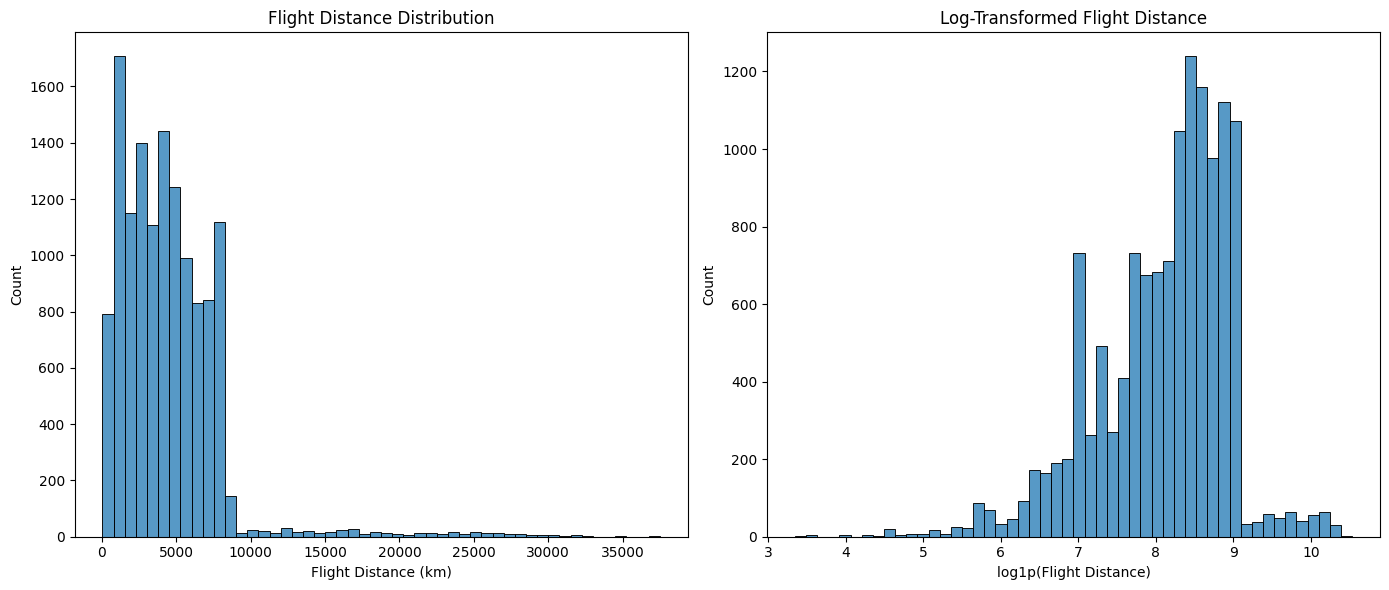

In [125]:

plt.figure(figsize=(14, 6))

# Raw flight distance
plt.subplot(1, 2, 1)
sns.histplot(df3['flight_distance_km'], bins=50, edgecolor='black')
plt.title('Flight Distance Distribution')
plt.xlabel('Flight Distance (km)')
plt.ylabel('Count')

# Log-transformed flight distance
plt.subplot(1, 2, 2)
sns.histplot(df3['log_flight_distance_km'], bins=50, edgecolor='black')
plt.title('Log-Transformed Flight Distance')
plt.xlabel('log1p(Flight Distance)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [126]:
df3['return_flight_booked'].value_counts()

,count
return_flight_booked,
1,12620
0,573


In [127]:
df3.isna().sum()

,0
trip_id,0
origin_country,0
origin_airport,0
origin_airport_lat,0
origin_airport_lon,0
destination,0
destination_country,0
destination_airport,0
destination_airport_lat,0
destination_airport_lon,0


In [128]:
df3['round_trip'] = df3['return_time'].notna()

In [129]:
df3

,trip_id,origin_country,origin_airport,origin_airport_lat,origin_airport_lon,destination,destination_country,destination_airport,destination_airport_lat,destination_airport_lon,...,departure_time,return_time,checked_bags,trip_airline,base_fare_usd,price,log_price,flight_distance_km,log_flight_distance_km,round_trip
0,582979-5475b9940ee240bf9328a0cc0bc9900c,US,RNO,39.498646,-119.773332,Ottawa,CA,YOW,45.323,-75.669,...,2023-03-31 07:00:00,2023-04-07 07:00:00,1,Air Canada,657.64,657.64,6.490177,7263.449742,8.890748,True
1,514785-863ac3b4eb984f1eb226d67955623a5d,US,FTW,32.750000,-97.333336,Montreal,CA,YHU,45.517,-73.417,...,2023-06-21 15:00:00,NaT,0,Delta Air Lines,221.83,221.83,5.406409,2488.569942,7.819865,False
2,588386-233db0f627cf4aaaaeaa9a632daa5ec4,US,CLE,41.406619,-81.851202,Philadelphia,US,PHL,39.872,-75.241,...,2023-04-04 08:00:00,2023-04-06 08:00:00,2,American Airlines,106.00,106.00,4.672829,1166.189989,7.062354,True
3,600395-79e934e3dcf2462587a0beffbebd6783,US,HOU,29.647149,-95.276926,Memphis,US,MEM,35.042,-89.977,...,2023-04-21 13:00:00,2023-04-24 13:00:00,0,Delta Air Lines,320.19,640.38,6.463622,1558.582556,7.352173,True
4,474120-a87f749cf54b4f4ca9262d07080a06b2,CA,YQB,46.792175,-71.385778,San Francisco,US,SFO,37.619,-122.375,...,2023-02-02 07:00:00,2023-02-07 07:00:00,0,Alaska Airlines,1507.83,3015.66,8.011906,8486.761030,9.046381,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13188,583623-70097bf1d1334cfb891ac2bd09f448ae,US,TUS,32.120245,-110.936877,Montreal,CA,YHU,45.517,-73.417,...,2023-02-23 11:00:00,2023-02-27 11:00:00,0,American Airlines,633.95,633.95,6.453546,7068.669789,8.863569,True
13189,512377-acf089357a6b497d91eda34bb532578d,US,LGA,40.775714,-73.873364,Washington,US,DCA,38.852,-77.037,...,2023-04-02 10:00:00,2023-04-08 10:00:00,1,American Airlines,59.34,59.34,4.099995,689.180299,6.536953,True
13190,497042-fa163de72e234eaf9c9bc8b477fbf66a,US,FAT,36.776006,-119.719745,San Antonio,US,RND,29.529,-98.279,...,2023-04-13 07:00:00,2023-04-16 07:00:00,0,United Airlines,369.10,369.10,5.913773,4292.908492,8.364953,True
13191,598533-40848e5db09e46aa8f56c0c3ccdefb2d,CA,YYJ,48.646302,-123.421709,Macau,MO,MFM,22.149,113.591,...,2024-01-23 19:00:00,2024-02-06 19:00:00,1,China Eastern Airlines,3861.04,7722.08,8.951969,20654.649680,9.935744,True


In [130]:
df3.duplicated().sum()

np.int64(0)

# **Sessions**

In [131]:
df4 = pd.read_csv('/content/drive/My Drive/Mastery Project/sessions.csv')

In [132]:
df4

,session_id,user_id,trip_id,session_start,session_end,flight_discount,hotel_discount,flight_discount_amount,hotel_discount_amount,flight_booked,hotel_booked,page_clicks,cancellation
0,536782-40ea451ff53841b296036272519d4e7e,536782,NaN,2023-01-18 19:33:00.000000,2023-01-18 19:34:20.000000,False,False,NaN,NaN,False,False,11,False
1,570600-1913f4dc10e445e59765e73588e68dfd,570600,NaN,2023-04-28 21:24:00.000000,2023-04-28 21:24:16.000000,False,False,NaN,NaN,False,False,2,False
2,677209-77c593f41bd04228b89a55b3a9d34141,677209,NaN,2023-06-01 21:20:00.000000,2023-06-01 21:20:24.000000,False,False,NaN,NaN,False,False,3,False
3,511055-89aed43aef924e97a0b4cadff654328f,511055,511055-57ed6923358d47a0a3be86eaf8128ece,2023-02-02 20:49:00.000000,2023-02-02 20:52:39.000000,True,False,0.10,NaN,True,True,30,False
4,546867-c1b3888def70494a893b025bfa3a1b80,546867,NaN,2023-03-04 20:38:00.000000,2023-03-04 20:39:08.000000,False,False,NaN,NaN,False,False,9,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47431,582801-f3c2610c200f441380a40d7bedf590f0,582801,582801-36ffbf38bbb944f29a14f0bba8b43186,2023-03-24 13:54:00.000000,2023-03-24 14:03:51.000000,False,False,NaN,NaN,True,True,79,False
47432,563059-0a1a6785fe7444afa95b80ac727fe7cb,563059,563059-965d2273d3c94ffab6915204c40828b0,2023-02-17 08:41:35.000000,2023-02-17 10:41:35.000000,True,True,NaN,NaN,True,True,200,True
47433,515523-a8d9bfbd2277461480f37b1126a557d6,515523,515523-5fbd163e4452409395e1f4615bd29dd9,2023-05-22 20:30:00.000000,2023-05-22 20:33:06.000000,False,True,NaN,0.05,True,True,25,False
47434,468666-70a4257758814acb944d9393207241ef,468666,468666-03b9b2050f5a4b239f20febab410c2fd,2023-03-04 21:24:00.000000,2023-03-04 21:27:53.000000,True,False,0.25,NaN,True,True,31,False


In [133]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47436 entries, 0 to 47435
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   session_id              47436 non-null  object 
 1   user_id                 47436 non-null  int64  
 2   trip_id                 16066 non-null  object 
 3   session_start           47436 non-null  object 
 4   session_end             47436 non-null  object 
 5   flight_discount         47436 non-null  bool   
 6   hotel_discount          47436 non-null  bool   
 7   flight_discount_amount  7971 non-null   float64
 8   hotel_discount_amount   6015 non-null   float64
 9   flight_booked           47436 non-null  bool   
 10  hotel_booked            47436 non-null  bool   
 11  page_clicks             47436 non-null  int64  
 12  cancellation            47436 non-null  bool   
dtypes: bool(5), float64(2), int64(2), object(4)
memory usage: 3.1+ MB


In [134]:
#check duplicates
df4.duplicated().sum()

np.int64(0)

In [135]:
df4.describe()

,user_id,flight_discount_amount,hotel_discount_amount,page_clicks
count,47436.000000,7971.000000,6015.000000,47436.000000
mean,547497.276246,0.139725,0.112211,17.598153
std,63772.497096,0.083942,0.062231,21.533788
min,94883.000000,0.050000,0.050000,1.000000
25%,519383.000000,0.100000,0.050000,6.000000
50%,542095.000000,0.100000,0.100000,13.000000
75%,575823.000000,0.200000,0.150000,22.000000
max,844489.000000,0.600000,0.450000,566.000000


In [136]:
df4.isna().sum()

,0
session_id,0
user_id,0
trip_id,31370
session_start,0
session_end,0
flight_discount,0
hotel_discount,0
flight_discount_amount,39465
hotel_discount_amount,41421
flight_booked,0


In [137]:
df4['session_start'] = pd.to_datetime(df4['session_start'])
df4['session_end'] = pd.to_datetime(df4['session_end'])

In [138]:
df4['session_length'] = (df4['session_end'] - df4['session_start']).dt.seconds #could be useful for User engagement, User intent or type, Behavior modeling

In [139]:
df4['click_rate'] = df4['page_clicks'] / df4['session_length']

In [140]:
df4['hotel_discount'] = df4['hotel_discount_amount'].notna()
df4['flight_discount'] = df4['flight_discount_amount'].notna()

In [141]:
#Lets check how many users have at least one flight_discount
users_with_flight_discount = df4.groupby('user_id')['flight_discount'].any()
users_with_hotel_discount = df4.groupby('user_id')['hotel_discount'].any()

# Count how many users that is
total_users_with_discount = users_with_flight_discount.sum()
total_users_with_discount2 = users_with_hotel_discount.sum()
print(f"Total users with at least one flight discount: {total_users_with_discount}")
print(f"Total users with at least one hotel discount: {total_users_with_discount2}")

Total users with at least one flight discount: 4504
Total users with at least one hotel discount: 3879


In [142]:
df4['hotel_discount'].value_counts()

,count
hotel_discount,
False,41421
True,6015


In [143]:
df4['both_discounts_given'] = df4['flight_discount'] & df4['hotel_discount']
df4['any_discount_given'] = df4['flight_discount'] | df4['hotel_discount']

In [144]:
def classify_booking(row):
    if row['flight_booked'] and row['hotel_booked']:
        return 'both'
    elif row['flight_booked']:
        return 'flight_only'
    elif row['hotel_booked']:
        return 'hotel_only'
    else:
        return 'none'

df4['booking_type'] = df4.apply(classify_booking, axis=1)

In [145]:
df4.groupby('user_id')['booking_type'].value_counts()

user_id  booking_type
94883    none            6
         both            2
101486   none            6
         both            1
         hotel_only      1
                        ..
801660   none            5
         both            3
811077   none            7
         both            1
844489   none            8
Name: count, Length: 14011, dtype: int64

In [146]:
#amount of cancelled trips
canceled_trips_count = df4[df4['cancellation']][['trip_id', 'user_id']].groupby('user_id').nunique()
canceled_trips_count.columns = ['canceled_trips']
canceled_trips_count

,canceled_trips
user_id,
106907,1
171470,2
174997,1
182191,1
204943,1
...,...
736075,1
752933,1
763129,1


In [147]:
df4.isna().sum()

,0
session_id,0
user_id,0
trip_id,31370
session_start,0
session_end,0
flight_discount,0
hotel_discount,0
flight_discount_amount,39465
hotel_discount_amount,41421
flight_booked,0


In [148]:
df4['flight_discount'] = df4['flight_discount'].astype(int)
df4['hotel_discount'] = df4['hotel_discount'].astype(int)
df4['flight_booked'] = df4['flight_booked'].astype(int)
df4['hotel_booked'] = df4['hotel_booked'].astype(int)
df4['cancellation'] = df4['cancellation'].astype(int)
df4['both_discounts_given'] = df4['both_discounts_given'].astype(int)
df4['any_discount_given'] = df4['any_discount_given'].astype(int)

In [149]:
df4

,session_id,user_id,trip_id,session_start,session_end,flight_discount,hotel_discount,flight_discount_amount,hotel_discount_amount,flight_booked,hotel_booked,page_clicks,cancellation,session_length,click_rate,both_discounts_given,any_discount_given,booking_type
0,536782-40ea451ff53841b296036272519d4e7e,536782,NaN,2023-01-18 19:33:00,2023-01-18 19:34:20,0,0,NaN,NaN,0,0,11,0,80,0.137500,0,0,none
1,570600-1913f4dc10e445e59765e73588e68dfd,570600,NaN,2023-04-28 21:24:00,2023-04-28 21:24:16,0,0,NaN,NaN,0,0,2,0,16,0.125000,0,0,none
2,677209-77c593f41bd04228b89a55b3a9d34141,677209,NaN,2023-06-01 21:20:00,2023-06-01 21:20:24,0,0,NaN,NaN,0,0,3,0,24,0.125000,0,0,none
3,511055-89aed43aef924e97a0b4cadff654328f,511055,511055-57ed6923358d47a0a3be86eaf8128ece,2023-02-02 20:49:00,2023-02-02 20:52:39,1,0,0.10,NaN,1,1,30,0,219,0.136986,0,1,both
4,546867-c1b3888def70494a893b025bfa3a1b80,546867,NaN,2023-03-04 20:38:00,2023-03-04 20:39:08,0,0,NaN,NaN,0,0,9,0,68,0.132353,0,0,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47431,582801-f3c2610c200f441380a40d7bedf590f0,582801,582801-36ffbf38bbb944f29a14f0bba8b43186,2023-03-24 13:54:00,2023-03-24 14:03:51,0,0,NaN,NaN,1,1,79,0,591,0.133672,0,0,both
47432,563059-0a1a6785fe7444afa95b80ac727fe7cb,563059,563059-965d2273d3c94ffab6915204c40828b0,2023-02-17 08:41:35,2023-02-17 10:41:35,0,0,NaN,NaN,1,1,200,1,7200,0.027778,0,0,both
47433,515523-a8d9bfbd2277461480f37b1126a557d6,515523,515523-5fbd163e4452409395e1f4615bd29dd9,2023-05-22 20:30:00,2023-05-22 20:33:06,0,1,NaN,0.05,1,1,25,0,186,0.134409,0,1,both
47434,468666-70a4257758814acb944d9393207241ef,468666,468666-03b9b2050f5a4b239f20febab410c2fd,2023-03-04 21:24:00,2023-03-04 21:27:53,1,0,0.25,NaN,1,1,31,0,233,0.133047,0,1,both


In [150]:
df4.duplicated().sum()

np.int64(0)

# **Visualizations - Sessions**

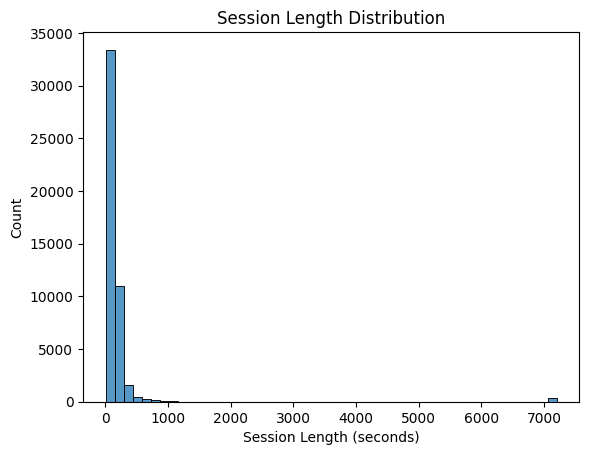

In [151]:
#distribution of session length
sns.histplot(df4['session_length'], bins=50, edgecolor='black')
plt.title('Session Length Distribution')
plt.xlabel('Session Length (seconds)')
plt.ylabel('Count')
plt.show()

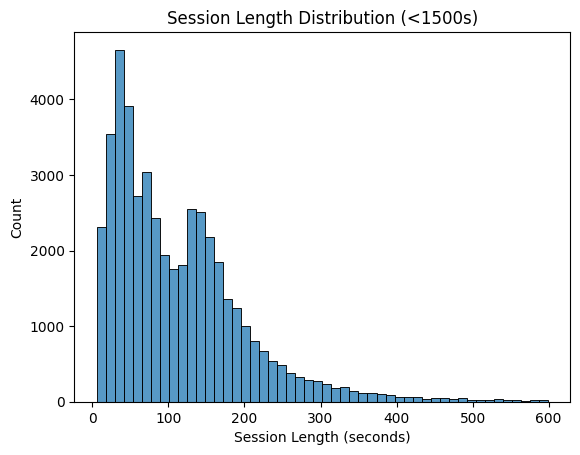

In [152]:
sns.histplot(df4[df4['session_length'] < 600]['session_length'], bins=50, edgecolor='black')
plt.title('Session Length Distribution (<1500s)')
plt.xlabel('Session Length (seconds)')
plt.ylabel('Count')
plt.show()

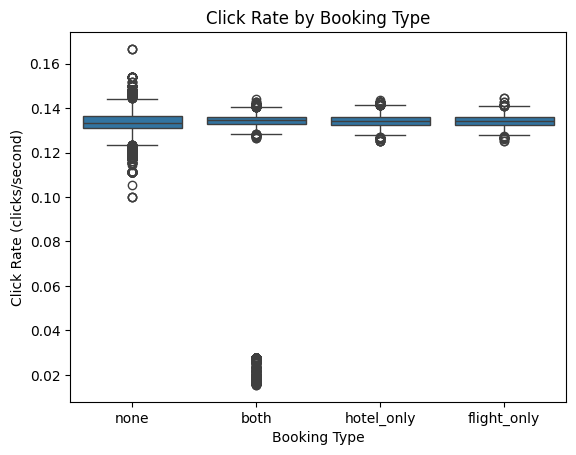

In [153]:
sns.boxplot(x='booking_type', y='click_rate', data=df4)
plt.title('Click Rate by Booking Type')
plt.ylabel('Click Rate (clicks/second)')
plt.xlabel('Booking Type')
plt.show()

In [154]:
quick_deciders = df4[
    (df4['booking_type'] == 'both') &
    (df4['click_rate'] > 0.14) &
    (df4['any_discount_given'] == False)
]

In [155]:
quick_deciders['page_clicks'].describe()

,page_clicks
count,59.000000
mean,20.372881
std,3.903572
min,15.000000
25%,17.500000
50%,20.000000
75%,22.500000
max,37.000000


In [156]:
quick_deciders['session_length'].describe()

,session_length
count,59.000000
mean,144.559322
std,27.855707
min,107.000000
25%,123.000000
50%,142.000000
75%,160.000000
max,264.000000


In [157]:
quick_deciders['click_rate'].describe()

,click_rate
count,59.000000
mean,0.140952
std,0.000731
min,0.140097
25%,0.140400
50%,0.140845
75%,0.141243
max,0.144000


In [158]:
df4.isna().sum()

,0
session_id,0
user_id,0
trip_id,31370
session_start,0
session_end,0
flight_discount,0
hotel_discount,0
flight_discount_amount,39465
hotel_discount_amount,41421
flight_booked,0


# **Get the updated Datasets ready for download**

In [159]:
df.to_csv('users_updated.csv', index=False)
df2.to_csv('hotels_updated.csv', index=False)
df3.to_csv('flights_updated.csv', index=False)
df4.to_csv('sessions_updated.csv', index=False)